## K√ºt√ºphaneleri Y√ºkleme

In [1]:
import warnings
import random
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [2]:
warnings.filterwarnings("ignore")

## Veriye ƒ∞lk Bakƒ±≈ü

In [3]:
df = pd.read_csv("C:/Users/musta/Desktop/orneklem_60000.csv")
pd.set_option('display.max_columns', None)

df.head(100)

ID   Source  Severity           Start_Time             End_Time  \
0   A-7145625  Source1         1  2020-03-30 17:09:22  2020-03-30 17:54:22   
1   A-7253631  Source1         3  2020-02-07 08:48:53  2020-02-07 09:18:38   
2   A-2811265  Source2         3  2018-05-08 05:52:33  2018-05-08 06:22:10   
3    A-519346  Source2         1  2022-09-01 18:04:40  2022-09-01 18:33:43   
4    A-514075  Source2         1  2022-09-07 08:46:42  2022-09-07 09:31:46   
..        ...      ...       ...                  ...                  ...   
95   A-554064  Source2         4  2022-07-27 13:47:52  2022-07-27 14:32:05   
96   A-928874  Source2         3  2021-08-23 17:31:21  2021-08-23 19:16:10   
97   A-732217  Source2         3  2022-01-27 16:24:10  2022-01-27 16:52:19   
98  A-1956359  Source2         3  2019-07-08 18:51:06  2019-07-08 19:36:29   
99   A-576003  Source2         1  2022-07-04 16:46:58  2022-07-04 17:31:37   

    Start_Lat   Start_Lng   End_Lat    End_Lng  Distance(mi)  \
0   40.666970 -111.888310  40.68702 -111.88828         1.385   
1   39.780240 -104.990500  39.78024 -104.99050         0.000   
2   34.350273 -118.542023       NaN        NaN         0.000   
3   28.240549  -82.320313       NaN        NaN         0.000   
4   42.348560  -71.069321       NaN        NaN         0.000   
..        ...         ...       ...        ...           ...   
95  33.645645  -84.447769       NaN        NaN         0.000   
96  34.914188  -82.107170       NaN        NaN         0.000   
97  36.845570  -76.251884       NaN        NaN         0.000   
98  32.852917  -96.562721       NaN        NaN         0.000   
99  34.509491  -82.758148       NaN        NaN         0.000   

                                          Description           Street  \
0                             At E 3900 S - Accident.       S State St   
1       At I-25/US-87/Valley Hwy/Exit 274 - Accident.           I-70 E   
2     Accident on I-5 Northbound before Gavin Canyon.            I-5 N   
3   Lane blocked due to crash on FL-54 at Vandine Rd.    State Road 54   
4                Crash on Melrose St at Arlington St.     Arlington St   
..                                                ...              ...   
95  Left hand shoulder blocked and left lane block...         GA-403 N   
96  Accident on I-85 Southbound at Exit 63 SC-290 ...           I-85 S   
97  Right lane closed due to accident on I-264 Wes...            I-264   
98  Lane blocked due to accident on I-30 Eastbound...  E Interstate 30   
99          Crash on Whitehall Rd at Moats Fowler Rd.  Moats Fowler Rd   

              City          County State     Zipcode Country     Timezone  \
0   Salt Lake City       Salt Lake    UT  84107-4844      US  US/Mountain   
1           Denver          Denver    CO       80216      US  US/Mountain   
2          Newhall     Los Angeles    CA       91321      US   US/Pacific   
3    Wesley Chapel           Pasco    FL       33543      US   US/Eastern   
4           Boston         Suffolk    MA  02116-5308      US   US/Eastern   
..             ...             ...   ...         ...     ...          ...   
95         Atlanta          Fulton    GA       30337      US   US/Eastern   
96          Duncan     Spartanburg    SC       29334      US   US/Eastern   
97         Norfolk  Norfolk (City)    VA       23504      US   US/Eastern   
98         Garland          Dallas    TX       75043      US   US/Central   
99        Anderson        Anderson    SC  29626-5221      US   US/Eastern   

   Airport_Code    Weather_Timestamp  Temperature(F)  Wind_Chill(F)  \
0          KU42  2020-03-30 16:54:00            57.0           57.0   
1          KBJC  2020-02-07 08:45:00            25.0           16.0   
2          K3A6  2018-05-08 05:51:00            58.0           58.0   
3          KZPH  2022-09-01 17:55:00            81.0           81.0   
4          KBOS  2022-09-07 08:54:00            65.0           65.0   
..          ...                  ...             ...            .

In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df_turkce = df.rename(columns={
    'ID': 'ID',
    'Source': 'Kaynak',
    'Severity': '≈ûiddet',
    'Start_Time': 'Ba≈ülangƒ±√ß_Zamanƒ±',
    'End_Time': 'Biti≈ü_Zamanƒ±',
    'Start_Lat': 'Ba≈ülangƒ±√ß_Enlem',
    'Start_Lng': 'Ba≈ülangƒ±√ß_Boylam',
    'End_Lat': 'Biti≈ü_Enlem',
    'End_Lng': 'Biti≈ü_Boylam',
    'Distance(mi)': 'Kaza_Uzunluƒüu',
    'Description': 'A√ßƒ±klama',
    'Street': 'Cadde',
    'City': '≈ûehir',
    'County': 'ƒ∞l√ße',
    'State': 'Eyalet',
    'Zipcode': 'Posta_Kodu',
    'Country': '√úlke',
    'Timezone': 'Zaman_Dilimi',
    'Airport_Code': 'Havalimanƒ±_Kodu',
    'Weather_Timestamp': 'Hava_Durumu_Zamanƒ±',
    'Temperature(F)': 'Sƒ±caklƒ±k(F)',
    'Wind_Chill(F)': 'Hissedilen_Sƒ±caklƒ±k(F)',
    'Humidity(%)': 'Nem(%)',
    'Pressure(in)': 'Basƒ±n√ß(in)',
    'Visibility(mi)': 'G√∂r√º≈ü_Mesafesi(mil)',
    'Wind_Direction': 'R√ºzgar_Y√∂n√º',
    'Wind_Speed(mph)': 'R√ºzgar_Hƒ±zƒ±(mph)',
    'Precipitation(in)': 'Yaƒüƒ±≈ü(in)',
    'Weather_Condition': 'Hava_Durumu',
    'Amenity': 'Donatƒ±',
    'Bump': 'T√ºmsek',
    'Crossing': 'Yaya_Ge√ßidi',
    'Give_Way': 'Yol_Ver',
    'Junction': 'Kav≈üak',
    'No_Exit': '√áƒ±kƒ±≈ü_Yok',
    'Railway': 'Demiryolu',
    'Roundabout': 'D√∂nel_Kav≈üak',
    'Station': 'ƒ∞stasyon',
    'Stop': 'Durak',
    'Traffic_Calming': 'Trafik_Yatƒ±≈ütƒ±rma',
    'Traffic_Signal': 'Trafik_I≈üƒ±ƒüƒ±',
    'Turning_Loop': 'D√∂n√º≈ü_Halkasƒ±',
    'Sunrise_Sunset': 'G√ºn_Doƒüumu_Batƒ±mƒ±',
    'Civil_Twilight': 'Sivil_Alacakaranlƒ±k',
    'Nautical_Twilight': 'Denizcilik_Alacakaranlƒ±ƒüƒ±',
    'Astronomical_Twilight': 'Astronomik_Alacakaranlƒ±k'
})
df_turkce

ID   Kaynak  ≈ûiddet     Ba≈ülangƒ±√ß_Zamanƒ±         Biti≈ü_Zamanƒ±  \
0      A-7145625  Source1       1  2020-03-30 17:09:22  2020-03-30 17:54:22   
1      A-7253631  Source1       3  2020-02-07 08:48:53  2020-02-07 09:18:38   
2      A-2811265  Source2       3  2018-05-08 05:52:33  2018-05-08 06:22:10   
3       A-519346  Source2       1  2022-09-01 18:04:40  2022-09-01 18:33:43   
4       A-514075  Source2       1  2022-09-07 08:46:42  2022-09-07 09:31:46   
...          ...      ...     ...                  ...                  ...   
59995  A-7190135  Source1       4  2020-04-22 09:41:59  2020-04-22 09:56:59   
59996  A-1375670  Source2       3  2020-09-05 11:16:33  2020-09-05 13:27:08   
59997  A-7185545  Source1       1  2020-04-19 02:36:41  2020-04-19 02:51:41   
59998   A-648109  Source2       2  2022-04-16 06:54:07  2022-04-16 07:38:52   
59999  A-5219749  Source1       4  2022-07-23 04:04:00  2022-07-23 06:45:00   

       Ba≈ülangƒ±√ß_Enlem  Ba≈ülangƒ±√ß_Boylam  Biti≈ü_Enlem  Biti≈ü_Boylam  \
0            40.666970       -111.888310    40.687020   -111.888280   
1            39.780240       -104.990500    39.780240   -104.990500   
2            34.350273       -118.542023          NaN           NaN   
3            28.240549        -82.320313          NaN           NaN   
4            42.348560        -71.069321          NaN           NaN   
...                ...               ...          ...           ...   
59995        42.335000        -71.075060    42.335000    -71.075060   
59996        32.806694       -117.215927          NaN           NaN   
59997        38.385500       -122.716310    38.385500   -122.716310   
59998        37.348045       -122.059761          NaN           NaN   
59999        33.808354        -84.250878    33.799164    -84.249758   

       Kaza_Uzunluƒüu                                           A√ßƒ±klama  \
0              1.385                            At E 3900 S - Accident.   
1              0.000      At I-25/US-87/Valley Hwy/Exit 274 - Accident.   
2              0.000    Accident on I-5 Northbound before Gavin Canyon.   
3              0.000  Lane blocked due to crash on FL-54 at Vandine Rd.   
4              0.000               Crash on Melrose St at Arlington St.   
...              ...                                                ...   
59995          0.000  Closed at Monsignor Reynolds Way/Malden St - R...   
59996          0.000  Lane blocked due to accident on I-5 Southbound...   
59997          0.000  At Santa Rosa Ave - Accident. Hard shoulder bl...   
59998          0.000  Two lanes blocked due to crash on CA-85 Northb...   
59999          0.638  Incident on I-285 SB near E PONCE DE LEON Road...   

               Cadde           ≈ûehir         ƒ∞l√ße Eyalet  Posta_Kodu √úlke  \
0         S State St  Salt Lake City    Salt Lake     UT  84107-4844   US   
1             I-70 E          Denver       Denver     CO       80216   US   
2              I-5 N         Newhall  Los Angeles     CA       91321   US   
3      State Road 54   Wesley Chapel        Pasco     FL       33543   US   
4       Arlington St          Boston      Suffolk     MA  02116-5308   US   
...              ...             ...          ...    ...         ...  ...   
59995   Harrison Ave          Boston      Suffolk     MA  02118-4080   US   
59996     Garnet Ave       San Diego    San Diego     CA       92117   US   
59997  Redwood Hwy S      Santa Rosa       Sonoma     CA       95407   US   
59998        CA-85 N       Sunnyvale  Santa Clara     CA       94087   US   
59999          I-285       Clarkston       Dekalb     GA       30021   US   

      Zaman_Dilimi Havalimanƒ±_Kodu   Hava_Durumu_Zamanƒ±  Sƒ±caklƒ±k(F)  \
0      US/Mountain            KU42  2020-03-30 16:54:00         57.0   
1      US/Mountain            KBJC  2020-02-07 08:45:00         25.0   
2       US/Pacific            K3A6  2018-05-08 05:51:00         58.0   
3       US/Eastern            KZPH  2022-09-01 17:55:00         81.0   


In [6]:
for sutun in df_turkce.columns:
    print(f"üî∏ {sutun} s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:")
    print(df_turkce[sutun].value_counts(dropna=False))
    print("-" * 50)

üî∏ ID s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
ID
A-625241     1
A-7054931    1
A-6344154    1
A-6959675    1
A-631747     1
            ..
A-514075     1
A-519346     1
A-2811265    1
A-7253631    1
A-7145625    1
Name: count, Length: 60000, dtype: int64
--------------------------------------------------
üî∏ Kaynak s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
Kaynak
Source1    33009
Source2    25450
Source3     1541
Name: count, dtype: int64
--------------------------------------------------
üî∏ ≈ûiddet s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
≈ûiddet
1    15000
3    15000
4    15000
2    15000
Name: count, dtype: int64
--------------------------------------------------
üî∏ Ba≈ülangƒ±√ß_Zamanƒ± s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
Ba≈ülangƒ±√ß_Zamanƒ±
2021-11-21 18:37:51    15
2021-05-28 07:31:48     6
2021-08-25 08:59:15     6
2022-08-02 14:36:08     6
2021-09-16 12:11:26     5
                       ..
2020-04-22 09:41:59     1
2020-09-05 11:16:33     1


In [7]:
df_turkce.describe().T

count       mean        std         min         25%  \
≈ûiddet                  60000.0   2.500000   1.118043    1.000000    1.750000   
Ba≈ülangƒ±√ß_Enlem         60000.0  36.657827   4.911308   24.662330   33.597845   
Ba≈ülangƒ±√ß_Boylam        60000.0 -92.092326  16.373874 -124.423677 -105.057301   
Biti≈ü_Enlem             33009.0  36.908275   4.979518   24.661070   33.668210   
Biti≈ü_Boylam            33009.0 -93.083537  17.270520 -124.424872 -111.888300   
Kaza_Uzunluƒüu           60000.0   0.692777   2.651274    0.000000    0.000000   
Sƒ±caklƒ±k(F)             60000.0  63.334312  18.872859  -24.000000   51.000000   
Hissedilen_Sƒ±caklƒ±k(F)  60000.0  62.147798  21.002843  -50.100000   51.000000   
Nem(%)                  60000.0  65.225750  23.526069    2.000000   48.000000   
Basƒ±n√ß(in)              60000.0  29.252072   1.212504   19.640000   29.100000   
G√∂r√º≈ü_Mesafesi(mil)     60000.0   9.067397   2.516800    0.000000   10.000000   
R√ºzgar_Hƒ±zƒ±(mph)        60000.0   7.396838   5.434228    0.000000    3.000000   
Yaƒüƒ±≈ü(in)               60000.0   0.006499   0.048632    0.000000    0.000000   

                              50%        75%         max  
≈ûiddet                   2.500000   3.250000    4.000000  
Ba≈ülangƒ±√ß_Enlem         36.833228  40.409213   48.999569  
Ba≈ülangƒ±√ß_Boylam       -85.174419 -80.066020  -68.338821  
Biti≈ü_Enlem             37.544433  40.534612   48.963812  
Biti≈ü_Boylam           -85.252287 -78.842790  -68.759328  
Kaza_Uzunluƒüu            0.000000   0.424000  242.339996  
Sƒ±caklƒ±k(F)             66.000000  77.000000  113.000000  
Hissedilen_Sƒ±caklƒ±k(F)  66.000000  77.000000  113.000000  
Nem(%)                  69.000000  85.000000  100.000000  
Basƒ±n√ß(in)              29.580000  29.920000   30.970000  
G√∂r√º≈ü_Mesafesi(mil)     10.000000  10.000000   75.000000  
R√ºzgar_Hƒ±zƒ±(mph)         7.000000  10.000000  142.000000  
Yaƒüƒ±≈ü(in)                0.000000   0.000000    3.190000

## Eksik Veri Analizi

In [8]:
print(df_turkce.isnull().sum())  
print("---------------------------------------------------")
print(df_turkce.isnull().mean() * 100)  

ID                               0
Kaynak                           0
≈ûiddet                           0
Ba≈ülangƒ±√ß_Zamanƒ±                 0
Biti≈ü_Zamanƒ±                     0
Ba≈ülangƒ±√ß_Enlem                  0
Ba≈ülangƒ±√ß_Boylam                 0
Biti≈ü_Enlem                  26991
Biti≈ü_Boylam                 26991
Kaza_Uzunluƒüu                    0
A√ßƒ±klama                         0
Cadde                            0
≈ûehir                            0
ƒ∞l√ße                             0
Eyalet                           0
Posta_Kodu                       0
√úlke                             0
Zaman_Dilimi                     0
Havalimanƒ±_Kodu                  0
Hava_Durumu_Zamanƒ±               0
Sƒ±caklƒ±k(F)                      0
Hissedilen_Sƒ±caklƒ±k(F)           0
Nem(%)                           0
Basƒ±n√ß(in)                       0
G√∂r√º≈ü_Mesafesi(mil)              0
R√ºzgar_Y√∂n√º                      0
R√ºzgar_Hƒ±zƒ±(mph)                 0
Yaƒüƒ±≈ü(in)    

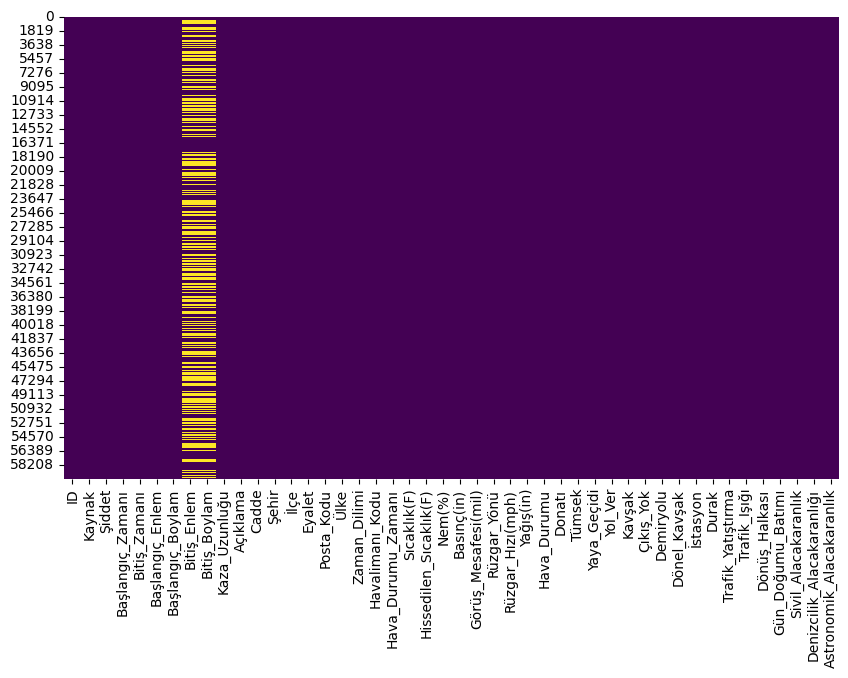

In [9]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

In [10]:
# Bu iki s√ºtundaki verilerin yarƒ±ya yakƒ±n bir kƒ±smƒ± eksik olduƒüu ve √ßok √∂nemli olmadƒ±klarƒ± i√ßin √ßƒ±karƒ±yoruz.
df_turkce.drop(['Biti≈ü_Enlem',
                'Biti≈ü_Boylam'], axis=1, inplace=True)

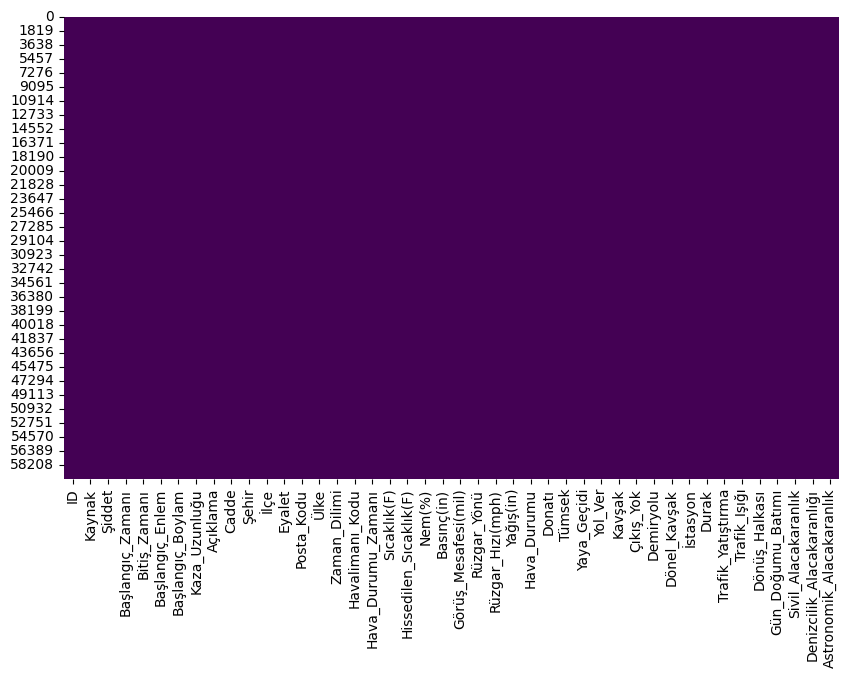

In [11]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

## Aykƒ±rƒ± Veri Analizi

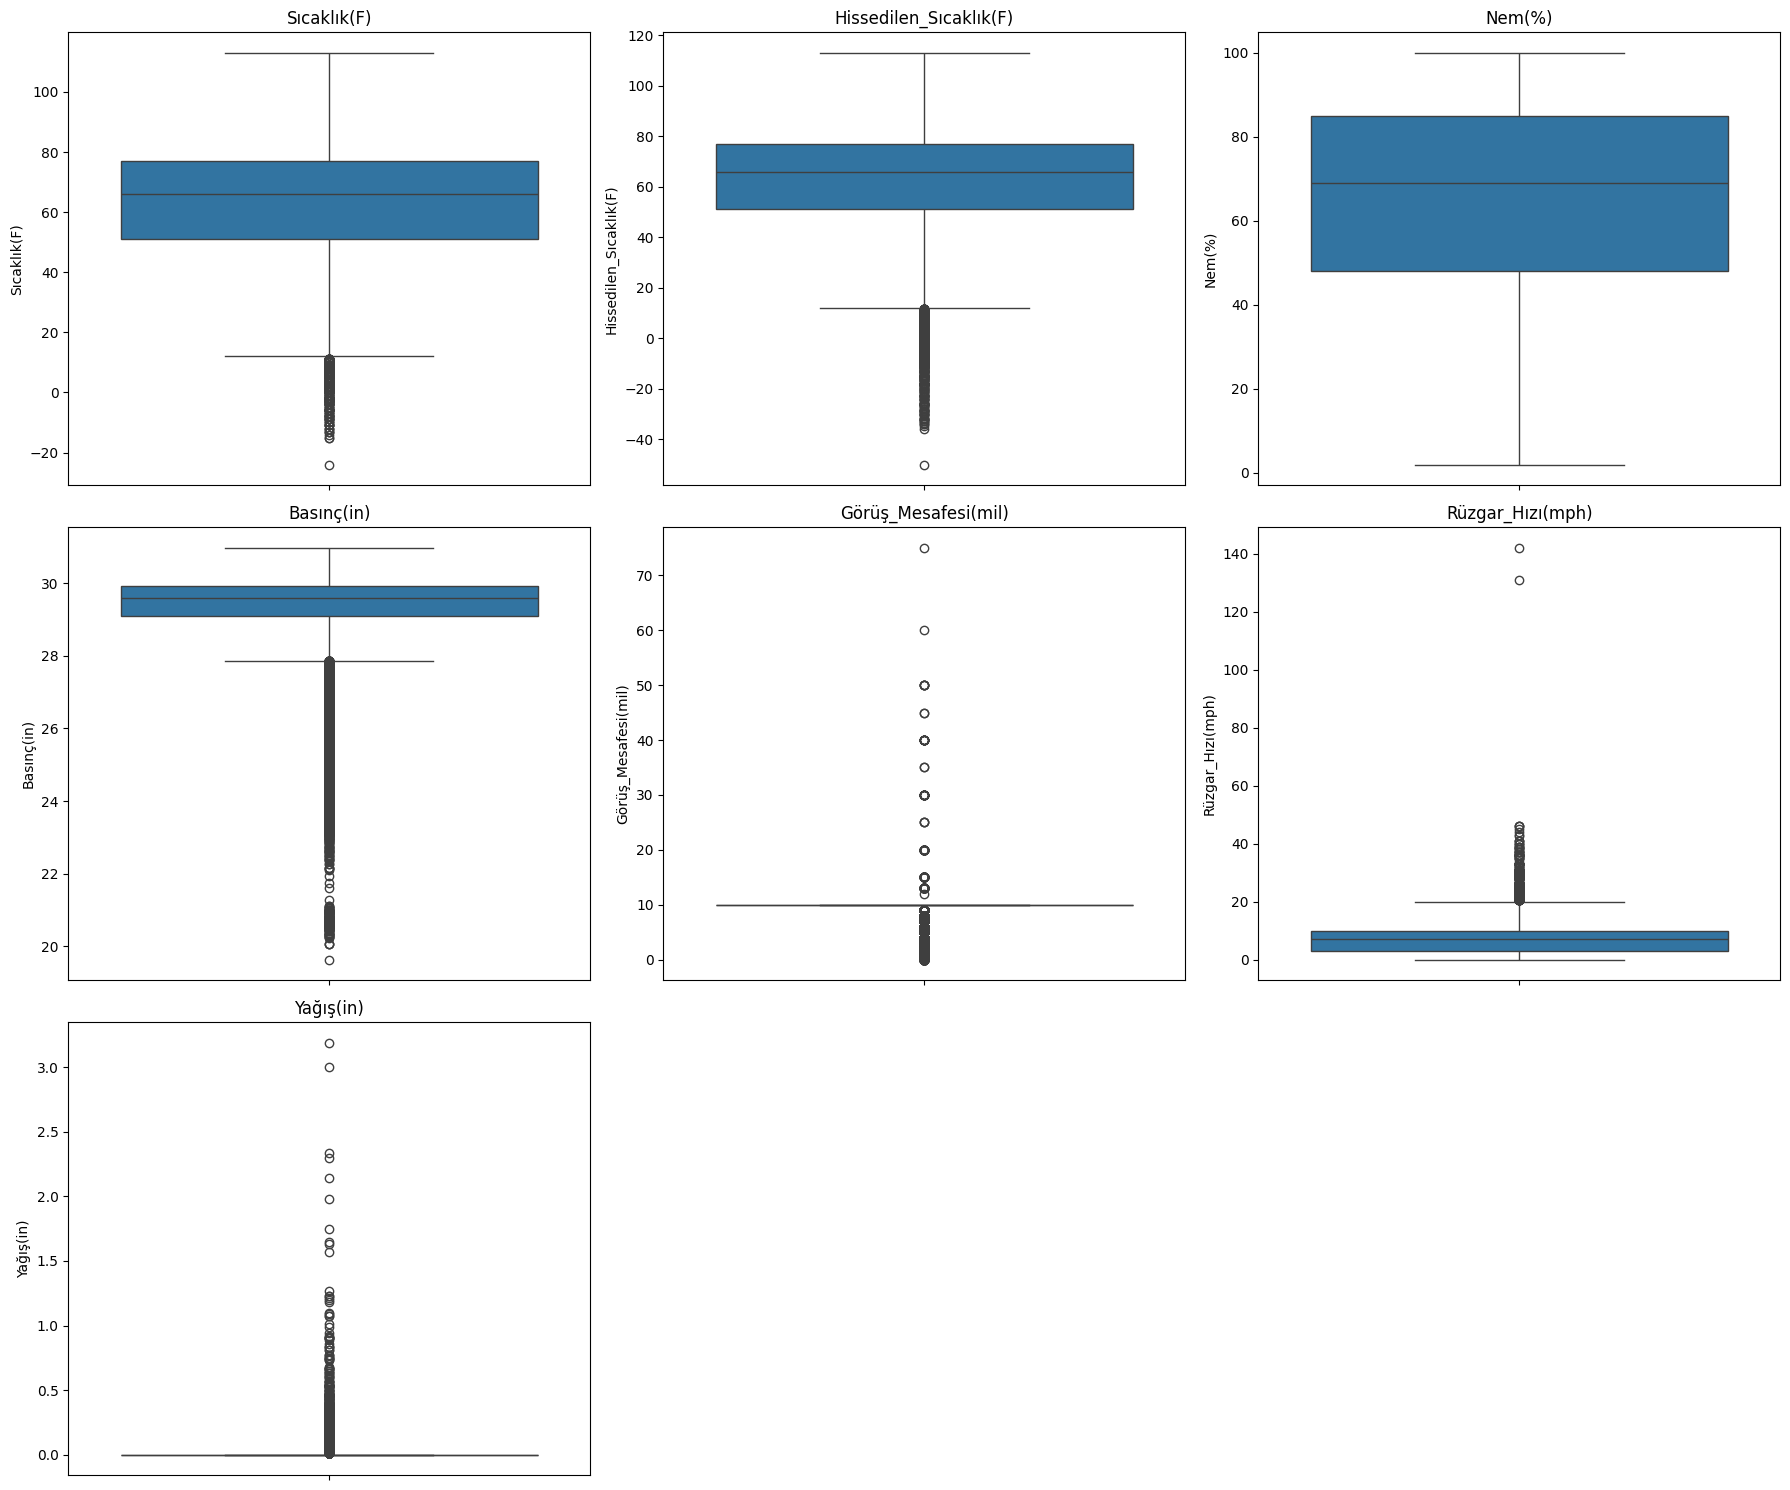

In [12]:
Sayisal_Sutunlar = ["Sƒ±caklƒ±k(F)", "Hissedilen_Sƒ±caklƒ±k(F)", "Nem(%)", 
                    "Basƒ±n√ß(in)", "G√∂r√º≈ü_Mesafesi(mil)", "R√ºzgar_Hƒ±zƒ±(mph)", "Yaƒüƒ±≈ü(in)"]

plt.figure(figsize=(18, 15))  
satir_sayisi = (len(Sayisal_Sutunlar) + 2) // 3  

for i, sutun in enumerate(Sayisal_Sutunlar, 1):
    plt.subplot(satir_sayisi, 3, i)
    sns.boxplot(y=df_turkce[sutun])
    plt.title(sutun)

plt.tight_layout()
plt.show()

## √ñzellik √áƒ±karƒ±mƒ± ve Se√ßimi

In [13]:
random.seed(42)
np.random.seed(42)

#### Ba≈ülangƒ±√ß Zamananƒ±nƒ± Ayrƒ±kla≈ütƒ±rma

In [14]:
df_turkce['Ba≈ülangƒ±√ß_Zamanƒ±'] = pd.to_datetime(df_turkce['Ba≈ülangƒ±√ß_Zamanƒ±'], errors='coerce')
df_turkce = df_turkce.dropna(subset=['Ba≈ülangƒ±√ß_Zamanƒ±'])  

saatler = df_turkce['Ba≈ülangƒ±√ß_Zamanƒ±'].dt.hour + df_turkce['Ba≈ülangƒ±√ß_Zamanƒ±'].dt.minute / 60

X = saatler.values.reshape(-1, 1)
kmeans = KMeans(n_clusters=5, random_state=42)
df_turkce['Zaman_K√ºmesi'] = kmeans.fit_predict(X)

print("Zaman K√ºme Aralƒ±klarƒ±:")
for k√ºme in sorted(df_turkce['Zaman_K√ºmesi'].unique()):
    k√ºme_saatleri = saatler[df_turkce['Zaman_K√ºmesi'] == k√ºme]
    min_saat = k√ºme_saatleri.min()
    max_saat = k√ºme_saatleri.max()
    print(f"K√ºme {k√ºme}: {int(min_saat):02d}:{int((min_saat%1)*60):02d} - {int(max_saat):02d}:{int((max_saat%1)*60):02d}")

Zaman K√ºme Aralƒ±klarƒ±:
K√ºme 0: 00:00 - 05:33
K√ºme 1: 14:48 - 19:00
K√ºme 2: 05:34 - 10:16
K√ºme 3: 10:18 - 14:46
K√ºme 4: 19:00 - 23:59


#### Ba≈ülangƒ±√ß ve Biti≈ü Zamanƒ± Deƒüerlerinden Kaza Etki S√ºresi √ñzelliƒüini √áƒ±karma

In [15]:
df_turkce['Ba≈ülangƒ±√ß_Zamanƒ±'] = pd.to_datetime(df_turkce['Ba≈ülangƒ±√ß_Zamanƒ±'])
df_turkce['Biti≈ü_Zamanƒ±'] = pd.to_datetime(df_turkce['Biti≈ü_Zamanƒ±'])

df_turkce['Kaza_Etki_S√ºresi'] = (df_turkce['Biti≈ü_Zamanƒ±'] - df_turkce['Ba≈ülangƒ±√ß_Zamanƒ±']).dt.total_seconds() / 3600

#### Ba≈ülangƒ±√ß Enlem ve Boylam Deƒüerlerini Ayrƒ±kla≈ütƒ±rma

In [16]:
koordinatlar = df_turkce[['Ba≈ülangƒ±√ß_Enlem', 'Ba≈ülangƒ±√ß_Boylam']].dropna()

X_koord = koordinatlar.values

kmeans = KMeans(n_clusters=5, random_state=42)
df_turkce.loc[koordinatlar.index, 'Konum_K√ºmesi'] = kmeans.fit_predict(X_koord)

print("üìå Konum K√ºme Aralƒ±klarƒ±:\n")
for i in range(5):
    cluster = df_turkce[df_turkce['Konum_K√ºmesi'] == i]
    enlem_min = cluster['Ba≈ülangƒ±√ß_Enlem'].min()
    enlem_max = cluster['Ba≈ülangƒ±√ß_Enlem'].max()
    boylam_min = cluster['Ba≈ülangƒ±√ß_Boylam'].min()
    boylam_max = cluster['Ba≈ülangƒ±√ß_Boylam'].max()
    print(f"K√ºme {i}: Enlem {enlem_min:.6f} - {enlem_max:.6f}, Boylam {boylam_min:.6f} - {boylam_max:.6f}")

üìå Konum K√ºme Aralƒ±klarƒ±:

K√ºme 0: Enlem 33.696823 - 47.860889, Boylam -98.734159 - -81.664290
K√ºme 1: Enlem 32.077637 - 48.999569, Boylam -124.423677 - -106.308142
K√ºme 2: Enlem 34.419226 - 45.946568, Boylam -81.914062 - -68.338821
K√ºme 3: Enlem 25.895210 - 47.116038, Boylam -108.305664 - -90.069748
K√ºme 4: Enlem 24.662330 - 37.319340, Boylam -90.407870 - -77.704315


#### Kaza Etki S√ºresi √ñzelliƒüini Ayrƒ±kla≈ütƒ±rma

In [17]:
df_turkce['Kaza_Etki_S√ºresi'] = pd.cut(
    df_turkce['Kaza_Etki_S√ºresi'],
    bins=[-float('inf'), 1, 3, 6, float('inf')],
    labels=["<1 Saat", "1 - 3 Saat", "3 - 6 Saat", "> 6 Saat"]
)

#### D√ºzenleme

In [18]:
sayi_yazi = {
    0: 'sƒ±fƒ±r',
    1: 'bir',
    2: 'iki',
    3: '√º√ß',
    4: 'd√∂rt',
    0.0: 'sƒ±fƒ±r',
    1.0: 'bir',
    2.0: 'iki',
    3.0: '√º√ß',
    4.0: 'd√∂rt'
}
siddet_yazi = {
    1: 'Hafif',
    2: 'Orta',
    3: 'Aƒüƒ±r',
    4: '√áok Aƒüƒ±r'
  
}

df_turkce['Zaman_K√ºmesi'] = df_turkce['Zaman_K√ºmesi'].map(sayi_yazi)
df_turkce['Konum_K√ºmesi'] = df_turkce['Konum_K√ºmesi'].map(sayi_yazi)
df_turkce['≈ûiddet'] = df_turkce['≈ûiddet'].map(siddet_yazi)

#### Kaza Uzunluƒüu S√ºtununu Ayrƒ±kla≈ütƒ±rma

In [19]:
df_turkce['Kaza_Uzunluƒüu'] = df_turkce['Kaza_Uzunluƒüu'].apply(
    lambda x: "<10 metre" if x < 0.0063 else ">10 metre"
)

#### Eyaletlerden Nuf√ºs ve GSYH √ñzelliklerini Ekleme

In [20]:
eyaletler = {
    'CA': {'GSYH': 1936, 'n√ºfus': 39.5},  
    'FL': {'GSYH': 754, 'n√ºfus': 21.5},  
    'VA': {'GSYH': 427, 'n√ºfus': 8.5},    
    'TX': {'GSYH': 1207, 'n√ºfus': 29.0}, 
    'NC': {'GSYH': 407, 'n√ºfus': 10.5},   
    'SC': {'GSYH': 164, 'n√ºfus': 5.1},  
    'PA': {'GSYH': 585, 'n√ºfus': 12.8},   
    'NY': {'GSYH': 1156, 'n√ºfus': 19.5},   
    'AZ': {'GSYH': 260, 'n√ºfus': 7.2},    
    'GA': {'GSYH': 404, 'n√ºfus': 10.6},   
    'IL': {'GSYH': 644, 'n√ºfus': 12.6},   
    'TN': {'GSYH': 250, 'n√ºfus': 6.8},    
    'MI': {'GSYH': 372, 'n√ºfus': 10.0},    
    'OR': {'GSYH': 168, 'n√ºfus': 4.2},    
    'CO': {'GSYH': 259, 'n√ºfus': 5.7},    
    'LA': {'GSYH': 213, 'n√ºfus': 4.6},    
    'OH': {'GSYH': 483, 'n√ºfus': 11.6},    
    'MD': {'GSYH': 300, 'n√ºfus': 6.0},   
    'NJ': {'GSYH': 497, 'n√ºfus': 8.8},    
    'WA': {'GSYH': 351, 'n√ºfus': 7.6},     
    'MN': {'GSYH': 267, 'n√ºfus': 5.6},     
    'AL': {'GSYH': 174, 'n√ºfus': 4.9},     
    'MA': {'GSYH': 377, 'n√ºfus': 6.9},     
    'IN': {'GSYH': 267, 'n√ºfus': 6.7},    
    'MO': {'GSYH': 246, 'n√ºfus': 6.1},    
    'CT': {'GSYH': 233, 'n√ºfus': 3.5},   
    'UT': {'GSYH': 117, 'n√ºfus': 3.2},    
    'OK': {'GSYH': 160, 'n√ºfus': 4.0},     
    'WI': {'GSYH': 251, 'n√ºfus': 5.8},    
    'AR': {'GSYH': 105, 'n√ºfus': 3.0},    
    'KY': {'GSYH': 161, 'n√ºfus': 4.5},   
    'IA': {'GSYH': 147, 'n√ºfus': 3.1},     
    'DE': {'GSYH': 62, 'n√ºfus': 1.0},      
    'KS': {'GSYH': 128, 'n√ºfus': 3.0},     
    'RI': {'GSYH': 49, 'n√ºfus': 1.0},      
    'DC': {'GSYH': 351, 'n√ºfus': 7.6},      
    'NV': {'GSYH': 127, 'n√ºfus': 3.1},   
    'MS': {'GSYH': 98, 'n√ºfus': 3.0},    
    'MT': {'GSYH': 37, 'n√ºfus': 1.0},     
    'NE': {'GSYH': 89, 'n√ºfus': 2.0},  
    'NM': {'GSYH': 75, 'n√ºfus': 2.1},   
    'WV': {'GSYH': 66, 'n√ºfus': 1.8},     
    'NH': {'GSYH': 61, 'n√ºfus': 1.3},       
    'ID': {'GSYH': 54, 'n√ºfus': 1.8},       
    'WY': {'GSYH': 38, 'n√ºfus': 0.6},       
    'ME': {'GSYH': 53, 'n√ºfus': 1.3},     
    'VT': {'GSYH': 26, 'n√ºfus': 0.6},       
    'SD': {'GSYH': 39, 'n√ºfus': 0.9},        
    'ND': {'GSYH': 33, 'n√ºfus': 0.7}         
}

In [21]:
nufuslar = np.array([eyaletler[ey]['n√ºfus'] for ey in eyaletler]).reshape(-1, 1)
gsyhler = np.array([eyaletler[ey]['GSYH'] for ey in eyaletler]).reshape(-1, 1)

def kategorik_etiketler(veri, isim):
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    etiketler = kmeans.fit_predict(veri)
    merkezler = kmeans.cluster_centers_.flatten()
    
    sirali_gruplar = np.argsort(merkezler)
    etiket_isimleri = ['D√º≈ü√ºk', 'Orta', 'Y√ºksek']
    etiket_haritasi = {sirali_gruplar[i]: etiket_isimleri[i] for i in range(3)}
    etiketler_kategorik = [etiket_haritasi[e] for e in etiketler]

    araliklar = [f"{etiket_isimleri[i]}: {min(veri[etiketler==sirali_gruplar[i]])} - {max(veri[etiketler==sirali_gruplar[i]])}" for i in range(3)]
    print(f"\n{isim} aralƒ±klarƒ±:")
    for aralik in araliklar:
        print(aralik)

    return etiketler_kategorik

nufus_kategorik = kategorik_etiketler(nufuslar, "N√ºfus")
gsyh_kategorik = kategorik_etiketler(gsyhler, "GSYH")

eyalet_df = pd.DataFrame({
    'Eyalet': list(eyaletler.keys()),
    'N√ºfus': nufus_kategorik,
    'GSYH': gsyh_kategorik
})

df_turkce = df_turkce.merge(eyalet_df, left_on='Eyalet', right_on='Eyalet', how='left')


N√ºfus aralƒ±klarƒ±:
D√º≈ü√ºk: [0.6] - [5.1]
Orta: [5.6] - [12.8]
Y√ºksek: [19.5] - [39.5]

GSYH aralƒ±klarƒ±:
D√º≈ü√ºk: [26] - [300]
Orta: [351] - [754]
Y√ºksek: [1156] - [1936]


In [22]:
df_turkce

ID   Kaynak    ≈ûiddet    Ba≈ülangƒ±√ß_Zamanƒ±        Biti≈ü_Zamanƒ±  \
0      A-7145625  Source1     Hafif 2020-03-30 17:09:22 2020-03-30 17:54:22   
1      A-7253631  Source1      Aƒüƒ±r 2020-02-07 08:48:53 2020-02-07 09:18:38   
2      A-2811265  Source2      Aƒüƒ±r 2018-05-08 05:52:33 2018-05-08 06:22:10   
3       A-519346  Source2     Hafif 2022-09-01 18:04:40 2022-09-01 18:33:43   
4       A-514075  Source2     Hafif 2022-09-07 08:46:42 2022-09-07 09:31:46   
...          ...      ...       ...                 ...                 ...   
55652  A-7190135  Source1  √áok Aƒüƒ±r 2020-04-22 09:41:59 2020-04-22 09:56:59   
55653  A-1375670  Source2      Aƒüƒ±r 2020-09-05 11:16:33 2020-09-05 13:27:08   
55654  A-7185545  Source1     Hafif 2020-04-19 02:36:41 2020-04-19 02:51:41   
55655   A-648109  Source2      Orta 2022-04-16 06:54:07 2022-04-16 07:38:52   
55656  A-5219749  Source1  √áok Aƒüƒ±r 2022-07-23 04:04:00 2022-07-23 06:45:00   

       Ba≈ülangƒ±√ß_Enlem  Ba≈ülangƒ±√ß_Boylam Kaza_Uzunluƒüu  \
0            40.666970       -111.888310     >10 metre   
1            39.780240       -104.990500     <10 metre   
2            34.350273       -118.542023     <10 metre   
3            28.240549        -82.320313     <10 metre   
4            42.348560        -71.069321     <10 metre   
...                ...               ...           ...   
55652        42.335000        -71.075060     <10 metre   
55653        32.806694       -117.215927     <10 metre   
55654        38.385500       -122.716310     <10 metre   
55655        37.348045       -122.059761     <10 metre   
55656        33.808354        -84.250878     >10 metre   

                                                A√ßƒ±klama          Cadde  \
0                                At E 3900 S - Accident.     S State St   
1          At I-25/US-87/Valley Hwy/Exit 274 - Accident.         I-70 E   
2        Accident on I-5 Northbound before Gavin Canyon.          I-5 N   
3      Lane blocked due to crash on FL-54 at Vandine Rd.  State Road 54   
4                   Crash on Melrose St at Arlington St.   Arlington St   
...                                                  ...            ...   
55652  Closed at Monsignor Reynolds Way/Malden St - R...   Harrison Ave   
55653  Lane blocked due to accident on I-5 Southbound...     Garnet Ave   
55654  At Santa Rosa Ave - Accident. Hard shoulder bl...  Redwood Hwy S   
55655  Two lanes blocked due to crash on CA-85 Northb...        CA-85 N   
55656  Incident on I-285 SB near E PONCE DE LEON Road...          I-285   

                ≈ûehir         ƒ∞l√ße Eyalet  Posta_Kodu √úlke Zaman_Dilimi  \
0      Salt Lake City    Salt Lake     UT  84107-4844   US  US/Mountain   
1              Denver       Denver     CO       80216   US  US/Mountain   
2             Newhall  Los Angeles     CA       91321   US   US/Pacific   
3       Wesley Chapel        Pasco     FL       33543   US   US/Eastern   
4              Boston      Suffolk     MA  02116-5308   US   US/Eastern   
...               ...          ...    ...         ...  ...          ...   
55652          Boston      Suffolk     MA  02118-4080   US   US/Eastern   
55653       San Diego    San Diego     CA       92117   US   US/Pacific   
55654      Santa Rosa       Sonoma     CA       95407   US   US/Pacific   
55655       Sunnyvale  Santa Clara     CA       94087   US   US/Pacific   
55656       Clarkston       Dekalb     GA       30021   US   US/Eastern   

      Havalimanƒ±_Kodu   Hava_Durumu_Zamanƒ±  Sƒ±caklƒ±k(F)  \
0                KU42  2020-03-30 16:54:00         57.0   
1                KBJC  2020-02-07 08:45:00         25.0   
2                K3A6  2018-05-08 05:51:00         58.0   
3                KZPH  2022-09-01 17:55:00         81.0   
4                KBOS  2022-09-07 08:54:00         65.0   
...               ...                  ...          ...   
55652            KBOS  2020-04-22 09:54:00         38.0   
55653            KMYF  2020-09-05 10:53:00         98.0   

#### √ñzellik Silme

In [23]:
df_turkce.drop(['ID',
                'Ba≈ülangƒ±√ß_Zamanƒ±', 
                "Biti≈ü_Zamanƒ±",
                "Ba≈ülangƒ±√ß_Enlem",
                'Ba≈ülangƒ±√ß_Boylam',  
                'Posta_Kodu',
                '√úlke',
                'D√∂n√º≈ü_Halkasƒ±',
                'Trafik_Yatƒ±≈ütƒ±rma',
                'D√∂nel_Kav≈üak',
                'T√ºmsek',
                'Hava_Durumu_Zamanƒ±',
                'A√ßƒ±klama',
                'Cadde', 
                "≈ûehir",
                "Eyalet",
                'ƒ∞l√ße',
                'Havalimanƒ±_Kodu'], axis=1, inplace=True)

#### D√ºzenleme ƒ∞≈ülemleri

In [24]:
df_turkce["Hava_Durumu"].unique()

array(['Mostly Cloudy', 'Light Snow', 'Partly Cloudy',
       'Partly Cloudy / Windy', 'Cloudy', 'Fair', 'Haze', 'Light Rain',
       'Cloudy / Windy', 'Light Drizzle', 'Rain', 'Snow', 'Overcast',
       'Fog', 'Wintry Mix', 'Freezing Rain', 'Heavy Rain',
       'Heavy T-Storm', 'Thunder', 'Thunder in the Vicinity',
       'Light Freezing Rain', 'Heavy Thunderstorms and Rain',
       'Mostly Cloudy / Windy', 'Fair / Windy', 'Heavy Snow',
       'Rain / Windy', 'Smoke', 'Light Snow / Windy',
       'Light Rain with Thunder', 'T-Storm', 'Scattered Clouds',
       'N/A Precipitation', 'Heavy Rain / Windy', 'Haze / Windy',
       'Patches of Fog', 'Showers in the Vicinity', 'Light Rain / Windy',
       'Heavy T-Storm / Windy', 'Shallow Fog', 'T-Storm / Windy',
       'Drizzle', 'Thunder / Windy', 'Light Freezing Drizzle',
       'Snow and Sleet / Windy', 'Heavy Snow / Windy', 'Heavy Drizzle',
       'Smoke / Windy', 'Squalls / Windy', 'Mist',
       'Light Thunderstorms and Rain', 'Clear',

In [25]:
def grupla_hava_durumu(durum):
    if durum in [
        'Clear', 'Fair', 'Partly Cloudy', 'Mostly Cloudy', 'Partly Cloudy / Windy', '',
        'Scattered Clouds', 'Fair / Windy'
    ]:
        return 'A√ßƒ±k / Par√ßalƒ± Bulutlu'
    
    elif durum in [
        'Cloudy', 'Overcast', 'Haze', 'Fog', 'Mist', 'Smoke',
        'Shallow Fog', 'Patches of Fog', 'N/A Precipitation',
        'Haze / Windy', 'Fog / Windy', 'Patches of Fog / Windy', 'Smoke / Windy'
    ]:
        return 'Bulutlu / Sisli / Dumanlƒ±'
    
    elif durum in [
        'Light Rain', 'Rain', 'Drizzle', 'Heavy Rain','Windy'
        'Showers in the Vicinity', 'Light Rain Shower',
        'Light Drizzle', 'Heavy Drizzle', 'Rain / Windy',
        'Light Rain / Windy', 'Drizzle and Fog',
        'Thunder', 'T-Storm', 'Thunder in the Vicinity',
        'Thunder / Windy', 'T-Storm / Windy', 'Light Rain with Thunder',
        'Heavy T-Storm', 'Heavy Thunderstorms and Rain',
        'Heavy T-Storm / Windy', 'Light Thunderstorms and Rain'
    ]:
        return 'Yaƒümur/R√ºzgar'
    
    elif durum in [
        'Snow', 'Light Snow', 'Heavy Snow', 'Blowing Snow',
        'Light Snow Shower', 'Light Snow / Windy', 'Heavy Snow / Windy',
        'Snow and Sleet', 'Snow and Sleet / Windy',
        'Light Snow and Sleet', 'Light Snow and Sleet / Windy',
        'Wintry Mix', 'Wintry Mix / Windy',
        'Freezing Rain', 'Light Freezing Rain', 'Light Freezing Rain / Windy',
        'Light Freezing Drizzle', 'Light Ice Pellets', 'Ice Pellets',
        'Sleet', 'Light Sleet', 'Blowing Snow / Windy'
    ]:
        return 'Kar / Karla Karƒ±≈üƒ±k'
    
    else:
        return 'Ekstrem / Diƒüer'


df_turkce['Hava_Durumu'] = df_turkce['Hava_Durumu'].apply(grupla_hava_durumu)

In [26]:
df_turkce["Yaƒüƒ±≈ü(in)"].unique()

array([0.  , 0.07, 0.03, 0.05, 0.02, 0.01, 0.11, 0.15, 0.1 , 0.04, 0.12,
       0.62, 0.09, 0.06, 0.19, 0.28, 0.24, 0.08, 0.26, 0.5 , 0.13, 0.14,
       0.17, 0.53, 0.31, 0.63, 3.  , 0.22, 0.25, 0.54, 0.23, 0.16, 0.2 ,
       0.35, 0.67, 0.49, 0.41, 0.46, 0.34, 0.18, 0.94, 0.45, 0.3 , 0.37,
       0.57, 0.38, 0.47, 0.39, 0.27, 1.63, 0.4 , 0.92, 0.33, 0.21, 0.43,
       0.44, 1.09, 0.76, 0.36, 0.32, 0.89, 0.48, 1.57, 1.23, 1.98, 0.99,
       0.52, 0.29, 0.77, 2.14, 3.19, 0.55, 0.51, 1.65, 1.1 , 0.75, 0.66,
       0.42, 0.73, 0.9 , 0.83, 0.65, 0.56, 1.75, 1.2 , 1.07, 0.59, 0.81,
       0.68, 0.86, 0.6 , 1.01, 1.27, 1.21, 0.74, 0.61, 0.91, 1.18])

In [27]:
yagis_verisi = df_turkce['Yaƒüƒ±≈ü(in)'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_turkce['Yaƒüƒ±≈ü_K√ºmesi'] = kmeans.fit_predict(yagis_verisi)

merkezler = sorted(kmeans.cluster_centers_.flatten())
sinirlar = [(merkezler[i] + merkezler[i + 1]) / 2 for i in range(len(merkezler) - 1)]

print("K√ºmeler arasƒ± sƒ±nƒ±rlar (in√ß cinsinden):")
print(f"Az:          0 - {sinirlar[0]:.2f}")
print(f"Orta:        {sinirlar[0]:.2f} - {sinirlar[1]:.2f}")
print(f"Y√ºksek:      {sinirlar[1]:.2f} - {sinirlar[2]:.2f}")
print(f"√áok Y√ºksek:  {sinirlar[2]:.2f} - max")

def yagis_grubu(deger):
    if deger <= sinirlar[0]:
        return "Az"
    elif deger <= sinirlar[1]:
        return "Orta"
    elif deger <= sinirlar[2]:
        return "Y√ºksek"
    else:
        return "√áok Y√ºksek"

df_turkce['Yaƒüƒ±≈ü(in)'] = df_turkce['Yaƒüƒ±≈ü(in)'].apply(yagis_grubu)

df_turkce.drop(columns=['Yaƒüƒ±≈ü_K√ºmesi'], inplace=True)

K√ºmeler arasƒ± sƒ±nƒ±rlar (in√ß cinsinden):
Az:          0 - 0.08
Orta:        0.08 - 0.40
Y√ºksek:      0.40 - 1.37
√áok Y√ºksek:  1.37 - max


In [28]:
df_turkce["R√ºzgar_Hƒ±zƒ±(mph)"].unique()

array([  8. ,   0. ,   5. ,  12. ,  22. ,   9. ,  13. ,   6. ,   3. ,
         7. ,  25. ,   4.6,  10. ,  15. ,  17. ,   5.8,   6.9,  18. ,
        28.8,  14. ,  16. ,  10.4,   8.1,  20. ,  18.4,  46. ,   9.2,
        21. ,  12.7,  23. ,  24. ,  11.5,  16.1,  39. ,  28. ,  19.6,
         2. ,  20.7,  25.3,  17.3,  21.9,  33. ,  13.8,  29. ,   3.5,
        35. ,  32.2,  24.2,  30. ,  31. ,  26. , 131. ,  36. ,  37. ,
       142. ,  38. ,  32. ,  27.6,  43. ,  26.5,  33.4,  34.5,  35.7,
        31.1,  41. ,  29.9,  40. ,  44. ,  42.6,  44.9])

In [29]:
ruzgar_verisi = df_turkce['R√ºzgar_Hƒ±zƒ±(mph)'].values.reshape(-1, 1)

kmeans_ruzgar = KMeans(n_clusters=5, random_state=42, n_init=10)
df_turkce['R√ºzgar_K√ºmesi'] = kmeans_ruzgar.fit_predict(ruzgar_verisi)

merkezler_ruzgar = sorted(kmeans_ruzgar.cluster_centers_.flatten())
sinirlar_ruzgar = [(merkezler_ruzgar[i] + merkezler_ruzgar[i + 1]) / 2 for i in range(len(merkezler_ruzgar) - 1)]

print("R√ºzgar hƒ±zƒ± k√ºmeleri (mph cinsinden):")
print(f"Yok/√áok Yava≈ü:  0 - {sinirlar_ruzgar[0]:.2f}")
print(f"Yava≈ü:          {sinirlar_ruzgar[0]:.2f} - {sinirlar_ruzgar[1]:.2f}")
print(f"Orta:           {sinirlar_ruzgar[1]:.2f} - {sinirlar_ruzgar[2]:.2f}")
print(f"Hƒ±zlƒ±:          {sinirlar_ruzgar[2]:.2f} - {sinirlar_ruzgar[3]:.2f}")
print(f"√áok Hƒ±zlƒ±:      {sinirlar_ruzgar[3]:.2f} - max")

def ruzgar_grubu(deger):
    if deger <= sinirlar_ruzgar[0]:
        return "Yok/√áok Yava≈ü"
    elif deger <= sinirlar_ruzgar[1]:
        return "Yava≈ü"
    elif deger <= sinirlar_ruzgar[2]:
        return "Orta"
    elif deger <= sinirlar_ruzgar[3]:
        return "Hƒ±zlƒ±"
    else:
        return "√áok Hƒ±zlƒ±"

df_turkce['R√ºzgar_Hƒ±zƒ±(mph)'] = df_turkce['R√ºzgar_Hƒ±zƒ±(mph)'].apply(ruzgar_grubu)

df_turkce.drop(columns=['R√ºzgar_K√ºmesi'], inplace=True)

R√ºzgar hƒ±zƒ± k√ºmeleri (mph cinsinden):
Yok/√áok Yava≈ü:  0 - 2.34
Yava≈ü:          2.34 - 6.51
Orta:           6.51 - 11.18
Hƒ±zlƒ±:          11.18 - 18.53
√áok Hƒ±zlƒ±:      18.53 - max


In [30]:
df_turkce["R√ºzgar_Y√∂n√º"].unique()

array(['NNW', 'S', 'CALM', 'NE', 'NNE', 'SE', 'SW', 'ESE', 'E', 'VAR',
       'SSE', 'N', 'ENE', 'W', 'WSW', 'WNW', 'NW', 'SSW', 'South',
       'North', 'East', 'West', 'Variable'], dtype=object)

In [31]:
def grupla_ruzgar_yonu(durum):
    if durum in [
        'CALM'

    ]:
        return 'R√ºzgar Yok'
    
    elif durum in [ 
        'S', 'SSW', 'SSE', 'South'

    ]:
        return 'G√ºney'
    
    elif durum in [ 
        'W', 'WSW', 'WNW', 'West'
    ]:
        return 'Batƒ±'
    
    elif durum in [  
        'N', 'NNW', 'NNE', 'North'
    ]:
        return 'Kuzey'

    elif durum in [  
        'E', 'ESE', 'ENE', 'East'
    ]:
        return 'Doƒüu'
    
    else:
        return '√áok Y√∂nl√º'


df_turkce['R√ºzgar_Y√∂n√º'] = df_turkce['R√ºzgar_Y√∂n√º'].apply(grupla_ruzgar_yonu)

In [32]:
df_turkce["G√∂r√º≈ü_Mesafesi(mil)"].unique()


array([1.0e+01, 1.0e+00, 2.0e+00, 7.0e+00, 9.0e+00, 4.0e+00, 8.0e+00,
       5.0e+00, 3.0e+00, 7.5e-01, 1.2e+00, 1.8e+00, 1.5e+01, 6.0e+00,
       5.0e-01, 2.0e+01, 1.5e+00, 2.5e-01, 2.0e-01, 8.0e-01, 1.3e+01,
       4.0e+01, 2.5e+00, 3.0e+01, 0.0e+00, 5.0e+01, 2.5e+01, 6.0e-02,
       8.8e-01, 7.5e+01, 1.2e-01, 1.0e-01, 1.9e-01, 6.3e-01, 3.8e-01,
       1.2e+01, 4.5e+01, 3.5e+01, 1.9e+00, 6.0e+01])

In [33]:
gorus_verisi = df_turkce['G√∂r√º≈ü_Mesafesi(mil)'].values.reshape(-1, 1)

kmeans_gorus = KMeans(n_clusters=4, random_state=42, n_init=10)
df_turkce['G√∂r√º≈ü_K√ºmesi'] = kmeans_gorus.fit_predict(gorus_verisi)

merkezler_gorus = sorted(kmeans_gorus.cluster_centers_.flatten())
sinirlar_gorus = [(merkezler_gorus[i] + merkezler_gorus[i + 1]) / 2 for i in range(len(merkezler_gorus) - 1)]

print("G√∂r√º≈ü Mesafesi k√ºmeleri (mil cinsinden):")
print(f"D√º≈ü√ºk:       0 - {sinirlar_gorus[0]:.2f}")
print(f"Orta:        {sinirlar_gorus[0]:.2f} - {sinirlar_gorus[1]:.2f}")
print(f"Y√ºksek:      {sinirlar_gorus[1]:.2f} - {sinirlar_gorus[2]:.2f}")
print(f"√áok Y√ºksek:  {sinirlar_gorus[2]:.2f} - max")

def gorus_grubu(deger):
    if deger <= sinirlar_gorus[0]:
        return "D√º≈ü√ºk"
    elif deger <= sinirlar_gorus[1]:
        return "Orta"
    elif deger <= sinirlar_gorus[2]:
        return "Y√ºksek"
    else:
        return "√áok Y√ºksek"

df_turkce['G√∂r√º≈ü_Mesafesi(mil)'] = df_turkce['G√∂r√º≈ü_Mesafesi(mil)'].apply(gorus_grubu)

df_turkce.drop(columns=['G√∂r√º≈ü_K√ºmesi'], inplace=True)

G√∂r√º≈ü Mesafesi k√ºmeleri (mil cinsinden):
D√º≈ü√ºk:       0 - 4.33
Orta:        4.33 - 8.27
Y√ºksek:      8.27 - 23.96
√áok Y√ºksek:  23.96 - max


In [34]:
df_turkce["Basƒ±n√ß(in)"].unique()

array([25.78, 24.23, 29.1 , 29.81, 30.05, 29.76, 29.93, 30.02, 29.95,
       29.99, 29.62, 30.01, 29.24, 29.53, 29.37, 30.15, 29.49, 29.68,
       29.89, 29.85, 30.04, 25.42, 28.59, 29.96, 30.58, 27.3 , 28.3 ,
       29.59, 29.  , 28.98, 28.07, 30.07, 29.31, 28.79, 29.88, 29.03,
       29.57, 29.84, 30.09, 28.55, 28.99, 29.44, 28.83, 30.03, 29.61,
       29.25, 28.8 , 29.02, 29.77, 29.8 , 29.21, 25.83, 29.2 , 27.15,
       28.86, 30.13, 29.92, 28.93, 30.19, 25.74, 28.57, 30.24, 28.94,
       29.27, 29.04, 28.95, 30.31, 29.41, 29.23, 29.07, 29.34, 25.82,
       29.58, 29.3 , 29.32, 28.87, 30.08, 28.77, 27.12, 29.4 , 28.56,
       29.33, 30.1 , 29.54, 29.63, 29.79, 29.08, 29.47, 29.38, 26.88,
       29.67, 29.52, 30.45, 29.82, 29.18, 30.12, 25.71, 28.85, 28.78,
       29.91, 29.14, 29.5 , 29.29, 24.48, 28.43, 28.51, 24.62, 28.88,
       27.49, 29.97, 29.94, 29.71, 29.48, 24.39, 29.72, 29.55, 29.78,
       29.7 , 29.36, 30.2 , 29.66, 29.73, 29.6 , 29.09, 30.27, 29.06,
       29.86, 29.28,

In [35]:
benzersiz_basinclar = df_turkce['Basƒ±n√ß(in)'].dropna().unique().reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=42)
kume_etiketleri = kmeans.fit_predict(benzersiz_basinclar)

merkezler = kmeans.cluster_centers_.flatten()
sirali_indexler = np.argsort(merkezler)

etiket_cevir = {sirali_indexler[0]: "D√º≈ü√ºk", 
                sirali_indexler[1]: "Orta", 
                sirali_indexler[2]: "Y√ºksek"}

etiket_df = pd.DataFrame({
    'Basƒ±n√ß(in)': benzersiz_basinclar.flatten(),
    'Etiket': [etiket_cevir[etiket] for etiket in kume_etiketleri]
})

df_turkce['Basƒ±n√ß(in)'] = df_turkce['Basƒ±n√ß(in)'].map(
    dict(zip(etiket_df['Basƒ±n√ß(in)'], etiket_df['Etiket']))
)

print("K√ºmelere g√∂re Basƒ±n√ß sƒ±nƒ±rlarƒ± (in):")
for kume in sirali_indexler:
    kume_degerleri = benzersiz_basinclar[kume_etiketleri == kume].flatten()
    print(f"{etiket_cevir[kume]}: {kume_degerleri.min():.2f} - {kume_degerleri.max():.2f}")

K√ºmelere g√∂re Basƒ±n√ß sƒ±nƒ±rlarƒ± (in):
D√º≈ü√ºk: 19.64 - 24.00
Orta: 24.01 - 27.32
Y√ºksek: 27.33 - 30.97


In [36]:
df_turkce["Nem(%)"].unique()

array([ 34.,  93.,  67.,  84., 100.,  59.,  71.,  73.,  98.,  68.,  53.,
        62.,  32.,  87.,  54.,  63.,  90.,  75.,  94.,  86.,  78.,  95.,
         6.,  74.,  96.,  85.,  70.,  82.,  77.,  50.,  45.,  52.,  83.,
        81.,  48.,  72.,  56.,  47.,  23.,  24.,   7.,  79.,  57.,  43.,
        92.,  69.,  91.,  80.,  39.,  35.,  55.,  33.,  30.,  97.,  61.,
        89.,  65.,  51.,  21.,  58.,  42.,  46.,  41.,  20.,  64.,  76.,
        49.,  40.,  37.,  38.,  88.,  36.,  13.,  17.,  99.,  66.,  44.,
        60.,  27.,  14.,  25.,  31.,  28.,  18.,  12.,  29.,   8.,  19.,
        16.,  26.,  22.,  11.,  10.,  15.,   9.,   5.,   4.,   2.,   3.])

In [37]:
nem_verisi = df_turkce['Nem(%)'].values.reshape(-1, 1)

kmeans_nem = KMeans(n_clusters=4, random_state=42, n_init=10)
df_turkce['Nem_K√ºmesi'] = kmeans_nem.fit_predict(nem_verisi)

merkezler_nem = sorted(kmeans_nem.cluster_centers_.flatten())
sinirlar_nem = [(merkezler_nem[i] + merkezler_nem[i + 1]) / 2 for i in range(len(merkezler_nem) - 1)]

print("Nem(%) k√ºmeleri:")
print(f"D√º≈ü√ºk:       0 - {sinirlar_nem[0]:.2f}")
print(f"Orta:        {sinirlar_nem[0]:.2f} - {sinirlar_nem[1]:.2f}")
print(f"Y√ºksek:      {sinirlar_nem[1]:.2f} - {sinirlar_nem[2]:.2f}")
print(f"√áok Y√ºksek:  {sinirlar_nem[2]:.2f} - 100")


def nem_grubu(deger):
    if deger <= sinirlar_nem[0]:
        return "D√º≈ü√ºk"
    elif deger <= sinirlar_nem[1]:
        return "Orta"
    elif deger <= sinirlar_nem[2]:
        return "Y√ºksek"
    else:
        return "√áok Y√ºksek"


df_turkce['Nem(%)'] = df_turkce['Nem(%)'].apply(nem_grubu)

df_turkce.drop(columns=['Nem_K√ºmesi'], inplace=True)

Nem(%) k√ºmeleri:
D√º≈ü√ºk:       0 - 36.71
Orta:        36.71 - 60.42
Y√ºksek:      60.42 - 81.05
√áok Y√ºksek:  81.05 - 100


In [38]:
sicaklik_verisi = df_turkce['Hissedilen_Sƒ±caklƒ±k(F)'].values.reshape(-1, 1)

kmeans_sicaklik = KMeans(n_clusters=5, random_state=42, n_init=10)
df_turkce['Sicaklik_K√ºmesi'] = kmeans_sicaklik.fit_predict(sicaklik_verisi)

merkezler_sicaklik = sorted(kmeans_sicaklik.cluster_centers_.flatten())
sinirlar_sicaklik = [(merkezler_sicaklik[i] + merkezler_sicaklik[i + 1]) / 2 for i in range(len(merkezler_sicaklik) - 1)]

print("Hissedilen Sƒ±caklƒ±k (F) k√ºmeleri:")
print(f"√áok Soƒüuk:  -‚àû - {sinirlar_sicaklik[0]:.2f}")
print(f"Soƒüuk:      {sinirlar_sicaklik[0]:.2f} - {sinirlar_sicaklik[1]:.2f}")
print(f"Normal:     {sinirlar_sicaklik[1]:.2f} - {sinirlar_sicaklik[2]:.2f}")
print(f"Sƒ±cak:      {sinirlar_sicaklik[2]:.2f} - {sinirlar_sicaklik[3]:.2f}")
print(f"√áok Sƒ±cak:  {sinirlar_sicaklik[3]:.2f} - ‚àû")

def sicaklik_grubu(deger):
    if deger <= sinirlar_sicaklik[0]:
        return "√áok Soƒüuk"
    elif deger <= sinirlar_sicaklik[1]:
        return "Soƒüuk"
    elif deger <= sinirlar_sicaklik[2]:
        return "Normal"
    elif deger <= sinirlar_sicaklik[3]:
        return "Sƒ±cak"
    else:
        return "√áok Sƒ±cak"

df_turkce['Hissedilen_Sƒ±caklƒ±k(F)'] = df_turkce['Hissedilen_Sƒ±caklƒ±k(F)'].apply(sicaklik_grubu)

df_turkce.drop(columns=['Sicaklik_K√ºmesi'], inplace=True)

Hissedilen Sƒ±caklƒ±k (F) k√ºmeleri:
√áok Soƒüuk:  -‚àû - 25.67
Soƒüuk:      25.67 - 46.94
Normal:     46.94 - 64.68
Sƒ±cak:      64.68 - 79.44
√áok Sƒ±cak:  79.44 - ‚àû


In [39]:
sicaklik_verisi2 = df_turkce['Sƒ±caklƒ±k(F)'].values.reshape(-1, 1)

kmeans_sicaklik_2 = KMeans(n_clusters=5, random_state=42, n_init=10)
df_turkce['Sicaklik_K√ºmesi_2'] = kmeans_sicaklik_2.fit_predict(sicaklik_verisi2)

merkezler_sicaklik_2 = sorted(kmeans_sicaklik_2.cluster_centers_.flatten())
sinirlar_sicaklik_2 = [(merkezler_sicaklik_2[i] + merkezler_sicaklik_2[i + 1]) / 2 for i in range(len(merkezler_sicaklik_2) - 1)]

print("Sƒ±caklƒ±k (F) k√ºmeleri:")
print(f"√áok Soƒüuk:  -‚àû - {sinirlar_sicaklik_2[0]:.2f}")
print(f"Soƒüuk:      {sinirlar_sicaklik_2[0]:.2f} - {sinirlar_sicaklik_2[1]:.2f}")
print(f"Normal:     {sinirlar_sicaklik_2[1]:.2f} - {sinirlar_sicaklik_2[2]:.2f}")
print(f"Sƒ±cak:      {sinirlar_sicaklik_2[2]:.2f} - {sinirlar_sicaklik_2[3]:.2f}")
print(f"√áok Sƒ±cak:  {sinirlar_sicaklik_2[3]:.2f} - ‚àû")

def sicaklik_grubu_2(deger):
    if deger <= sinirlar_sicaklik_2[0]:
        return "√áok Soƒüuk"
    elif deger <= sinirlar_sicaklik_2[1]:
        return "Soƒüuk"
    elif deger <= sinirlar_sicaklik_2[2]:
        return "Normal"
    elif deger <= sinirlar_sicaklik_2[3]:
        return "Sƒ±cak"
    else:
        return "√áok Sƒ±cak"

df_turkce['Sƒ±caklƒ±k(F)'] = df_turkce['Sƒ±caklƒ±k(F)'].apply(sicaklik_grubu_2)

df_turkce.drop(columns=['Sicaklik_K√ºmesi_2'], inplace=True)

Sƒ±caklƒ±k (F) k√ºmeleri:
√áok Soƒüuk:  -‚àû - 34.90
Soƒüuk:      34.90 - 51.76
Normal:     51.76 - 66.54
Sƒ±cak:      66.54 - 80.39
√áok Sƒ±cak:  80.39 - ‚àû


In [40]:
for sutun in df_turkce.columns:
    print(f"üî∏ {sutun} s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:")
    print(df_turkce[sutun].value_counts(dropna=False))
    print("-" * 50)

üî∏ Kaynak s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
Kaynak
Source1    28666
Source2    25450
Source3     1541
Name: count, dtype: int64
--------------------------------------------------
üî∏ ≈ûiddet s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
≈ûiddet
Aƒüƒ±r        15000
Hafif       14998
√áok Aƒüƒ±r    12942
Orta        12717
Name: count, dtype: int64
--------------------------------------------------
üî∏ Kaza_Uzunluƒüu s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
Kaza_Uzunluƒüu
<10 metre    31593
>10 metre    24064
Name: count, dtype: int64
--------------------------------------------------
üî∏ Zaman_Dilimi s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
Zaman_Dilimi
US/Eastern     28657
US/Central     11868
US/Pacific     10458
US/Mountain     4674
Name: count, dtype: int64
--------------------------------------------------
üî∏ Sƒ±caklƒ±k(F) s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
Sƒ±caklƒ±k(F)
Sƒ±cak        17653
Normal       13804
√áok Sƒ±cak    10360
Soƒüuk  

In [41]:
df_turkce

Kaynak    ≈ûiddet Kaza_Uzunluƒüu Zaman_Dilimi Sƒ±caklƒ±k(F)  \
0      Source1     Hafif     >10 metre  US/Mountain      Normal   
1      Source1      Aƒüƒ±r     <10 metre  US/Mountain   √áok Soƒüuk   
2      Source2      Aƒüƒ±r     <10 metre   US/Pacific      Normal   
3      Source2     Hafif     <10 metre   US/Eastern   √áok Sƒ±cak   
4      Source2     Hafif     <10 metre   US/Eastern      Normal   
...        ...       ...           ...          ...         ...   
55652  Source1  √áok Aƒüƒ±r     <10 metre   US/Eastern       Soƒüuk   
55653  Source2      Aƒüƒ±r     <10 metre   US/Pacific   √áok Sƒ±cak   
55654  Source1     Hafif     <10 metre   US/Pacific       Soƒüuk   
55655  Source2      Orta     <10 metre   US/Pacific      Normal   
55656  Source1  √áok Aƒüƒ±r     >10 metre   US/Eastern       Sƒ±cak   

      Hissedilen_Sƒ±caklƒ±k(F)      Nem(%) Basƒ±n√ß(in) G√∂r√º≈ü_Mesafesi(mil)  \
0                     Normal       D√º≈ü√ºk       Orta              Y√ºksek   
1                  √áok Soƒüuk  √áok Y√ºksek       Orta               D√º≈ü√ºk   
2                     Normal      Y√ºksek     Y√ºksek              Y√ºksek   
3                  √áok Sƒ±cak  √áok Y√ºksek     Y√ºksek              Y√ºksek   
4                      Sƒ±cak  √áok Y√ºksek     Y√ºksek              Y√ºksek   
...                      ...         ...        ...                 ...   
55652                  Soƒüuk        Orta     Y√ºksek              Y√ºksek   
55653              √áok Sƒ±cak       D√º≈ü√ºk     Y√ºksek              Y√ºksek   
55654                 Normal  √áok Y√ºksek     Y√ºksek              Y√ºksek   
55655                 Normal  √áok Y√ºksek     Y√ºksek               D√º≈ü√ºk   
55656                  Sƒ±cak  √áok Y√ºksek     Y√ºksek              Y√ºksek   

      R√ºzgar_Y√∂n√º R√ºzgar_Hƒ±zƒ±(mph) Yaƒüƒ±≈ü(in)                Hava_Durumu  \
0           Kuzey             Orta        Az     A√ßƒ±k / Par√ßalƒ± Bulutlu   
1           G√ºney             Orta        Az        Kar / Karla Karƒ±≈üƒ±k   
2      R√ºzgar Yok    Yok/√áok Yava≈ü        Az     A√ßƒ±k / Par√ßalƒ± Bulutlu   
3       √áok Y√∂nl√º            Yava≈ü        Az     A√ßƒ±k / Par√ßalƒ± Bulutlu   
4           Kuzey            Hƒ±zlƒ±        Az     A√ßƒ±k / Par√ßalƒ± Bulutlu   
...           ...              ...       ...                        ...   
55652        Batƒ±            Hƒ±zlƒ±        Az     A√ßƒ±k / Par√ßalƒ± Bulutlu   
55653   √áok Y√∂nl√º            Yava≈ü        Az     A√ßƒ±k / Par√ßalƒ± Bulutlu   
55654  R√ºzgar Yok    Yok/√áok Yava≈ü        Az  Bulutlu / Sisli / Dumanlƒ±   
55655  R√ºzgar Yok    Yok/√áok Yava≈ü        Az  Bulutlu / Sisli / Dumanlƒ±   
55656  R√ºzgar Yok    Yok/√áok Yava≈ü        Az     A√ßƒ±k / Par√ßalƒ± Bulutlu   

       Donatƒ±  Yaya_Ge√ßidi  Yol_Ver  Kav≈üak  √áƒ±kƒ±≈ü_Yok  Demiryolu  ƒ∞stasyon  \
0       False         True    False   False      False      False     False   
1       False        False    False   False      False      False     False   
2       False        False    False   False      False      False     False   
3       False        False    False   False      False      False     False   
4       False         True    False   False      False      False     False   
...       ...          ...      ...     ...        ...        ...       ...   
55652   False         True    False   False      False      False      True   
55653   False        False    False   False      False      False     False   
55654   False        False    False   False      False      False     False   
55655   False        False    False   False      False      False     False   
55656   False        False    False   False      False      False     False   

       Durak  Trafik_I≈üƒ±ƒüƒ± G√ºn_Doƒüumu_Batƒ±mƒ± Sivil_Alacakaranlƒ±k  \
0      False          True               Day                 Day   
1      False         False               Day                 Day   
2      False         False             Night                 Day   
3      False 

## Veri G√∂rselle≈ütirme 

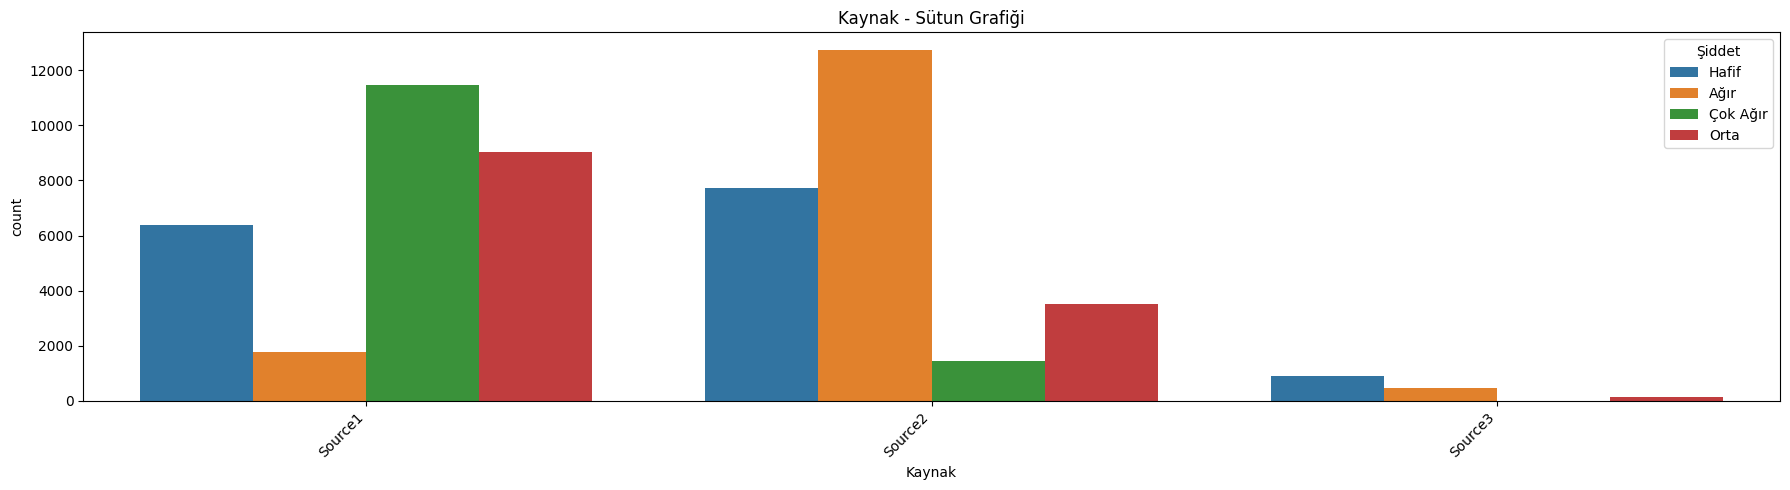

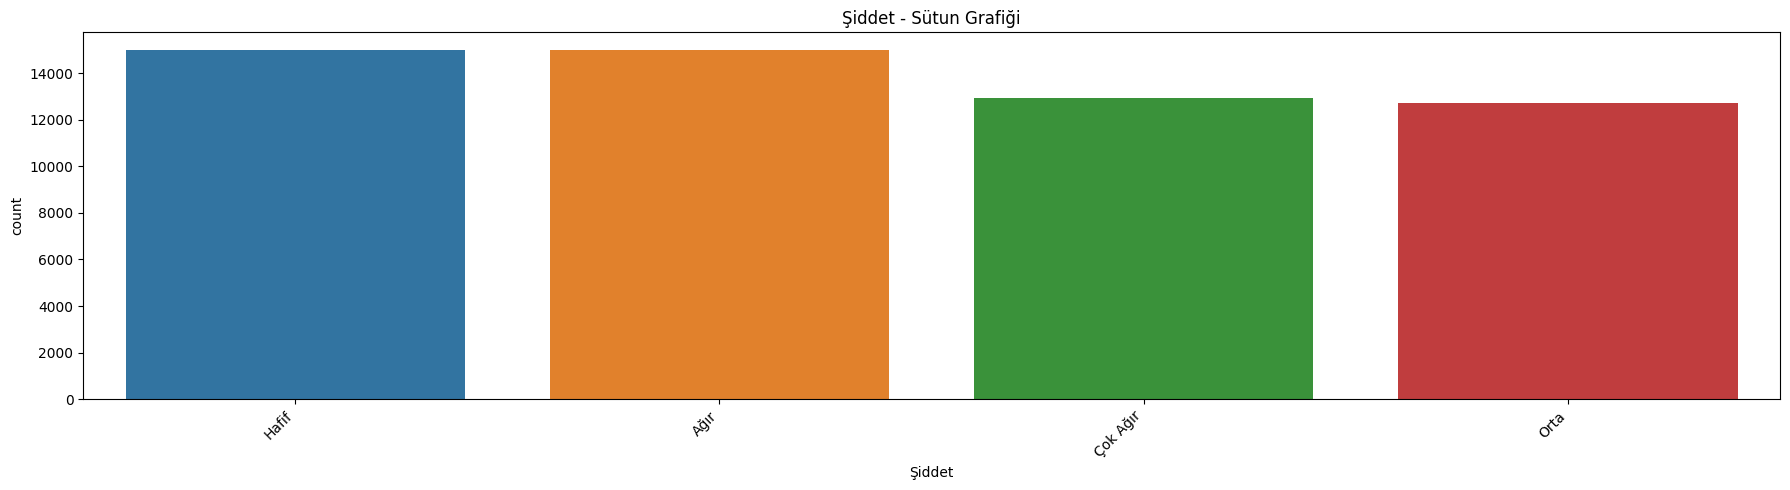

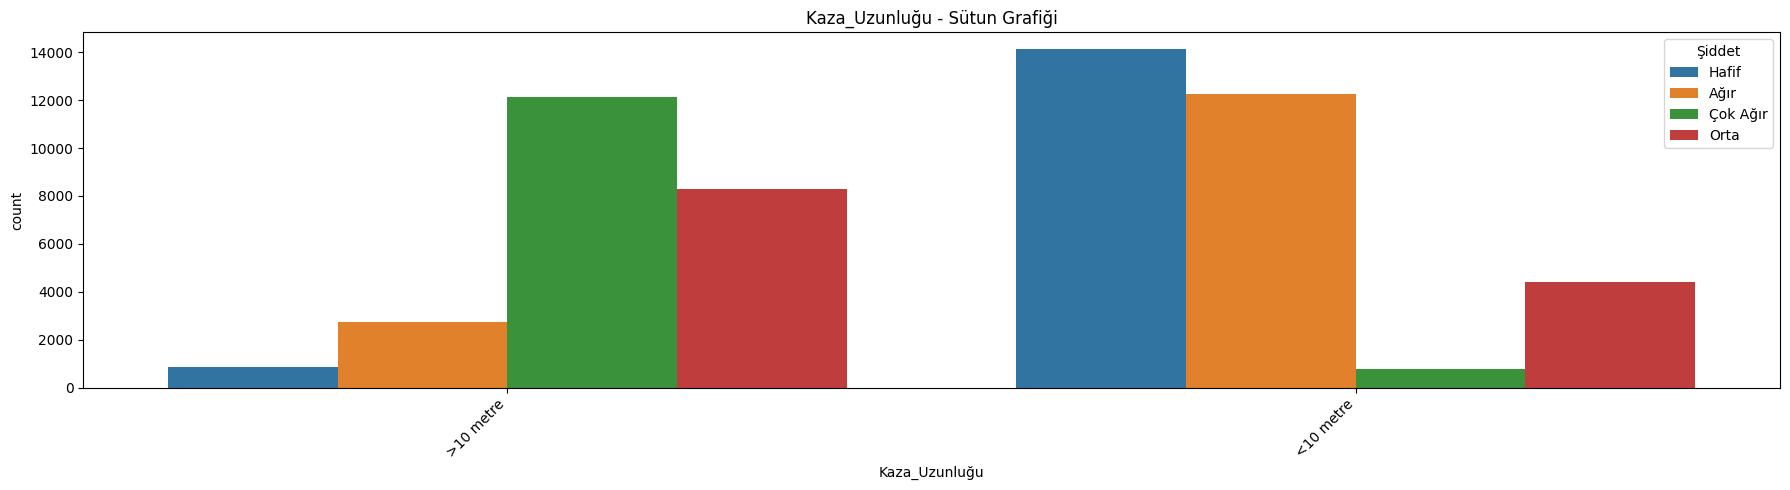

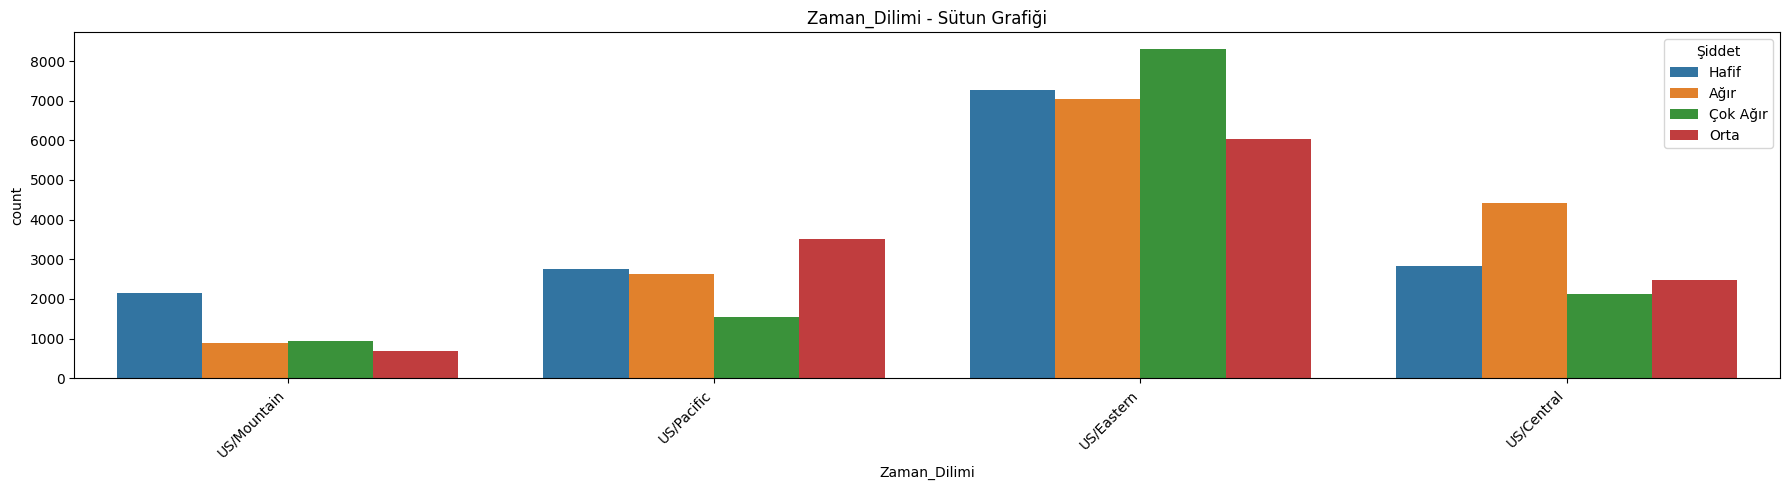

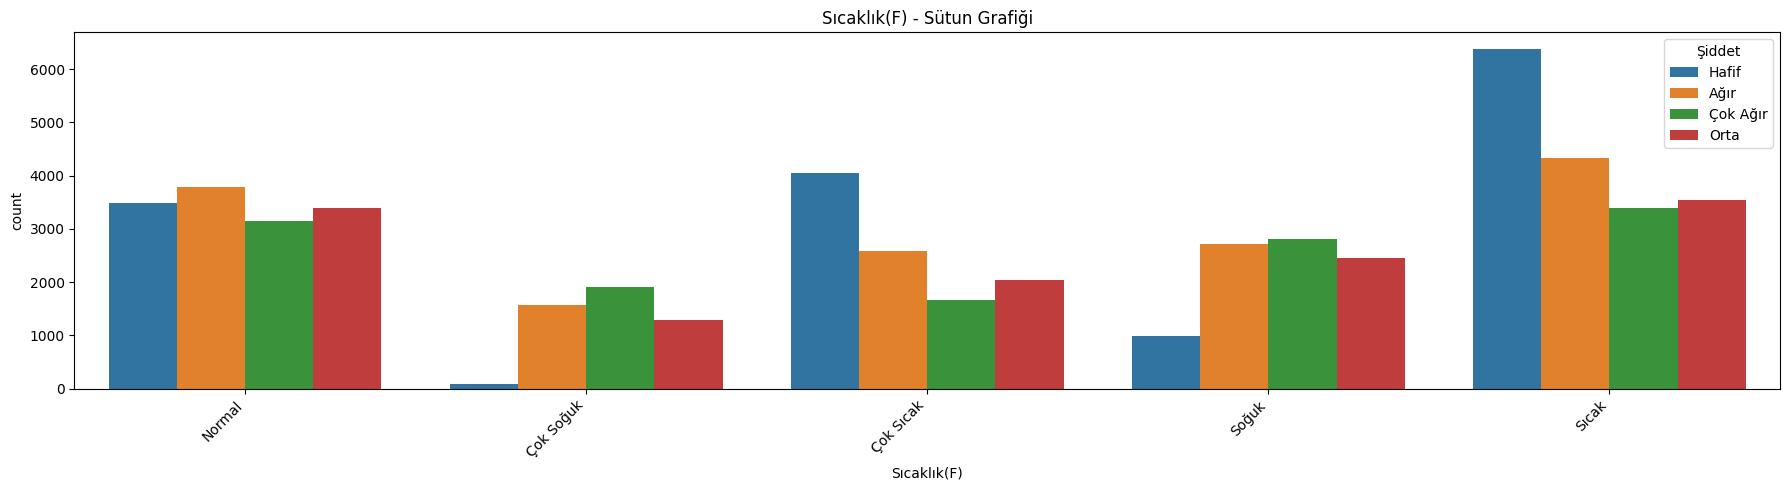

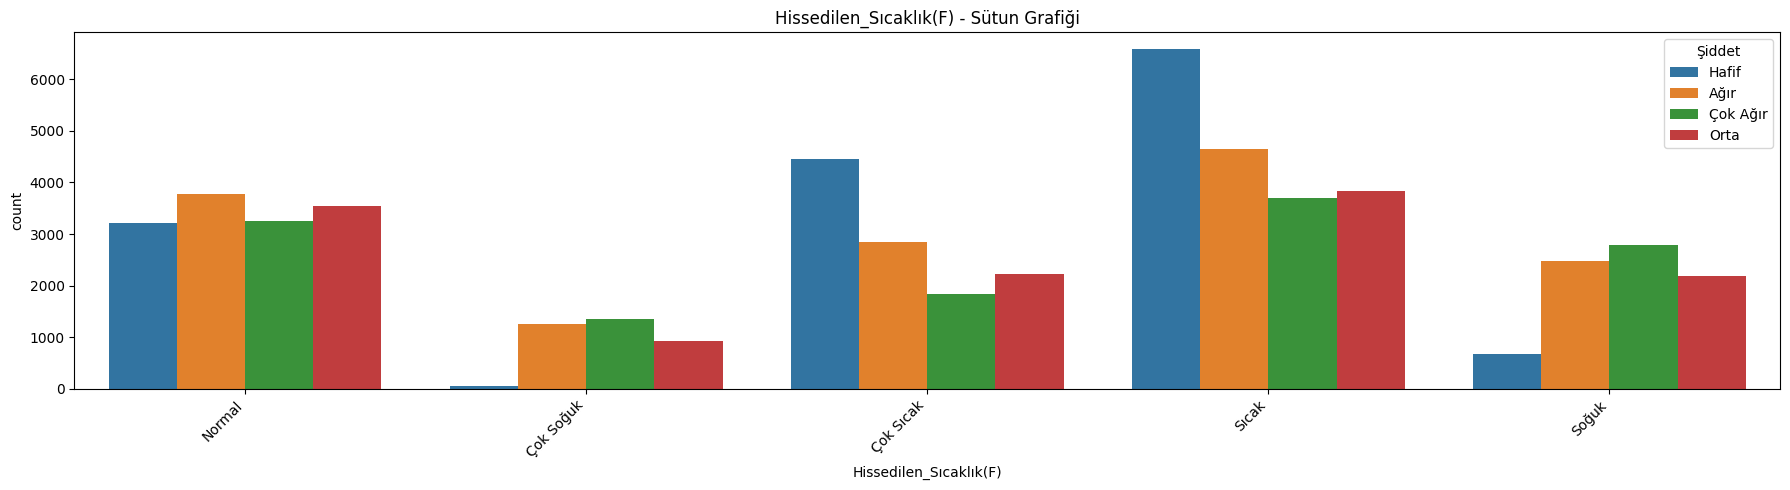

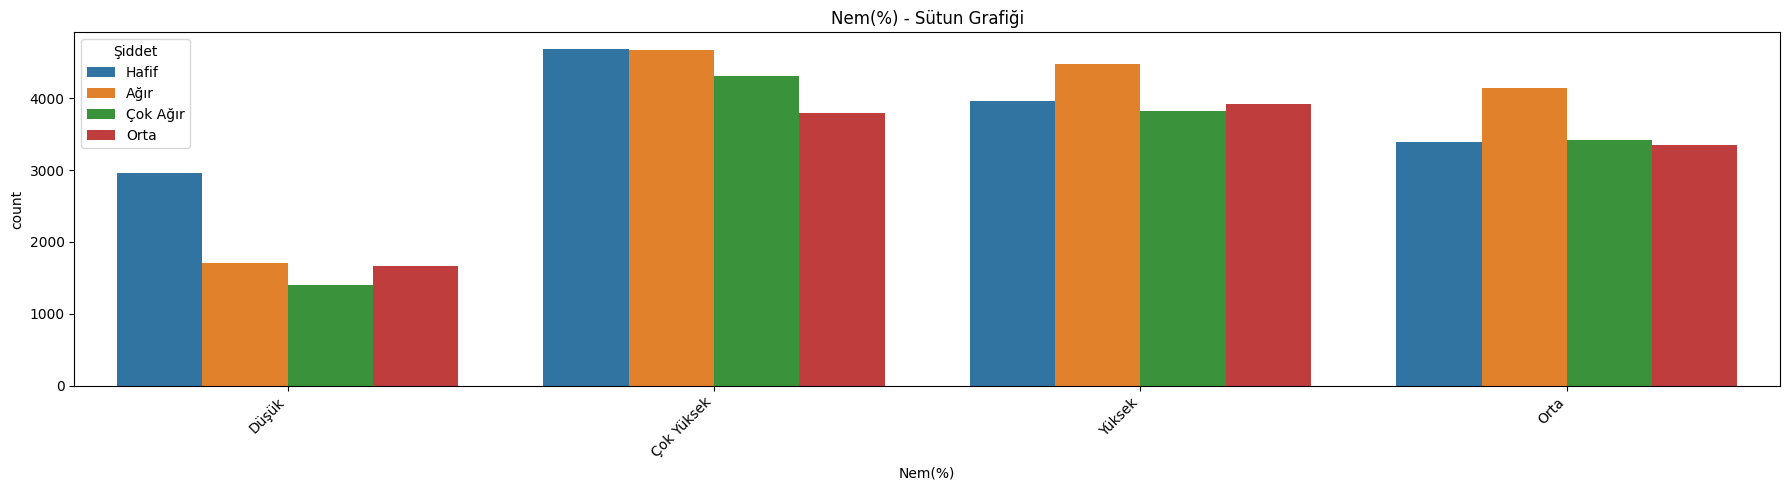

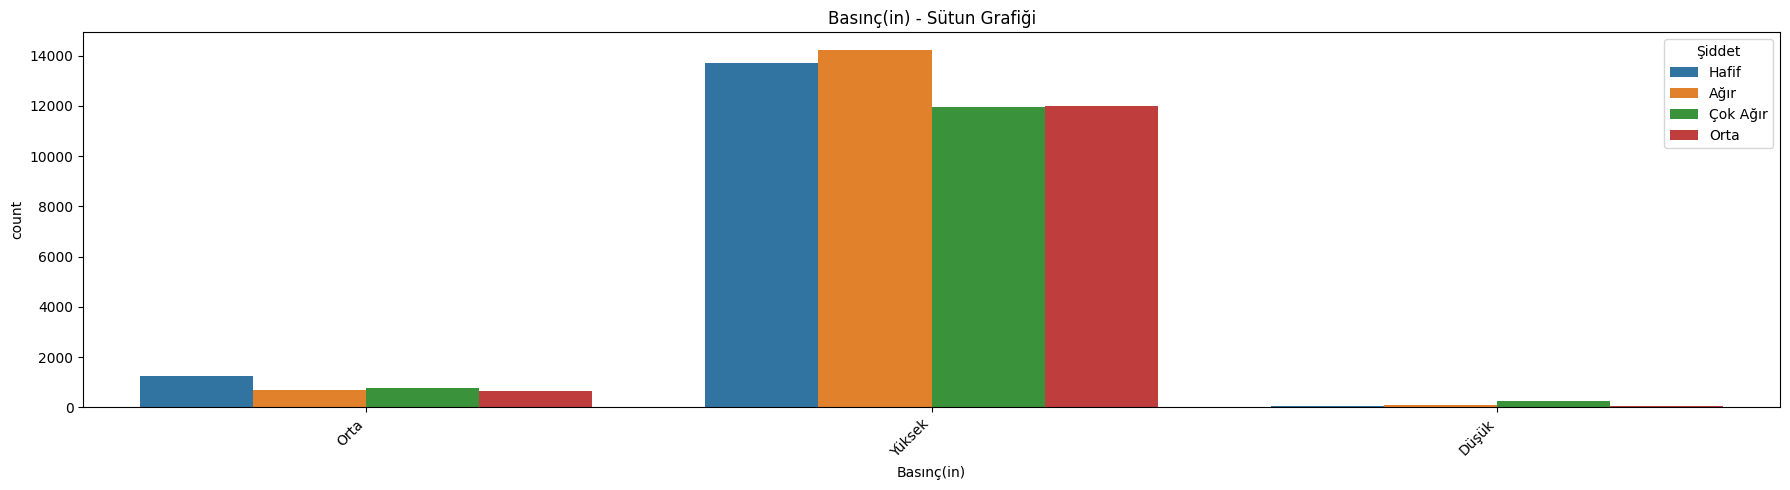

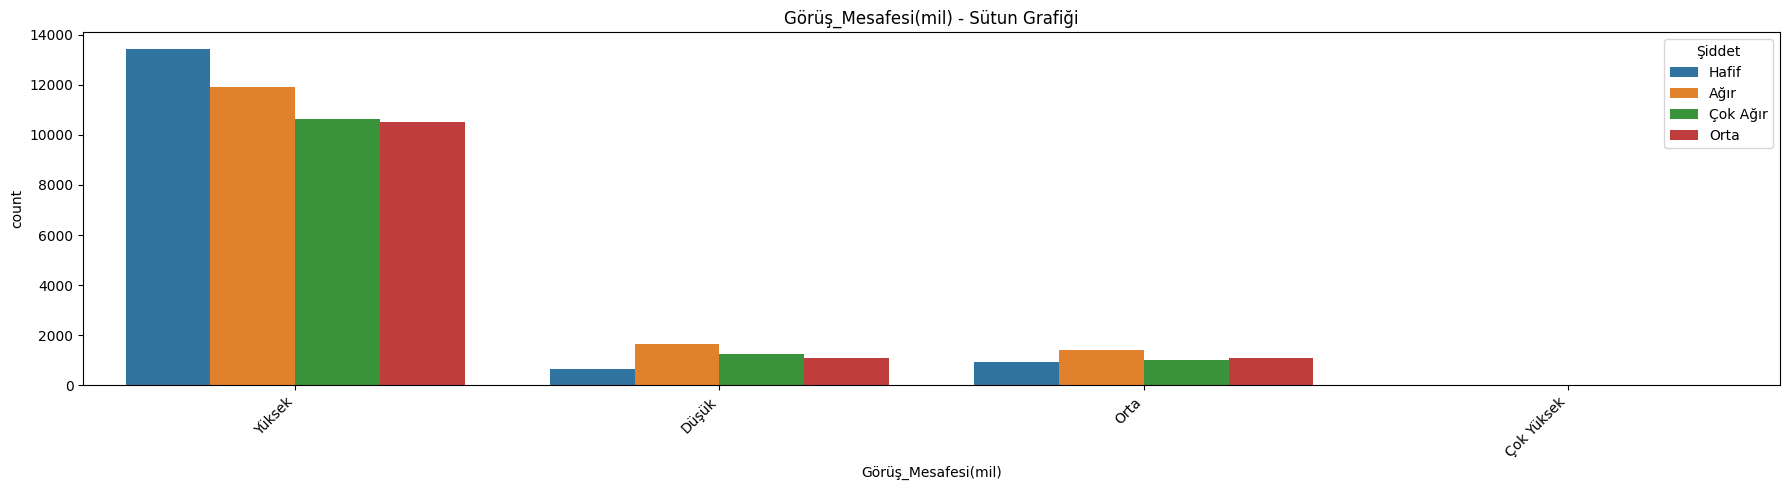

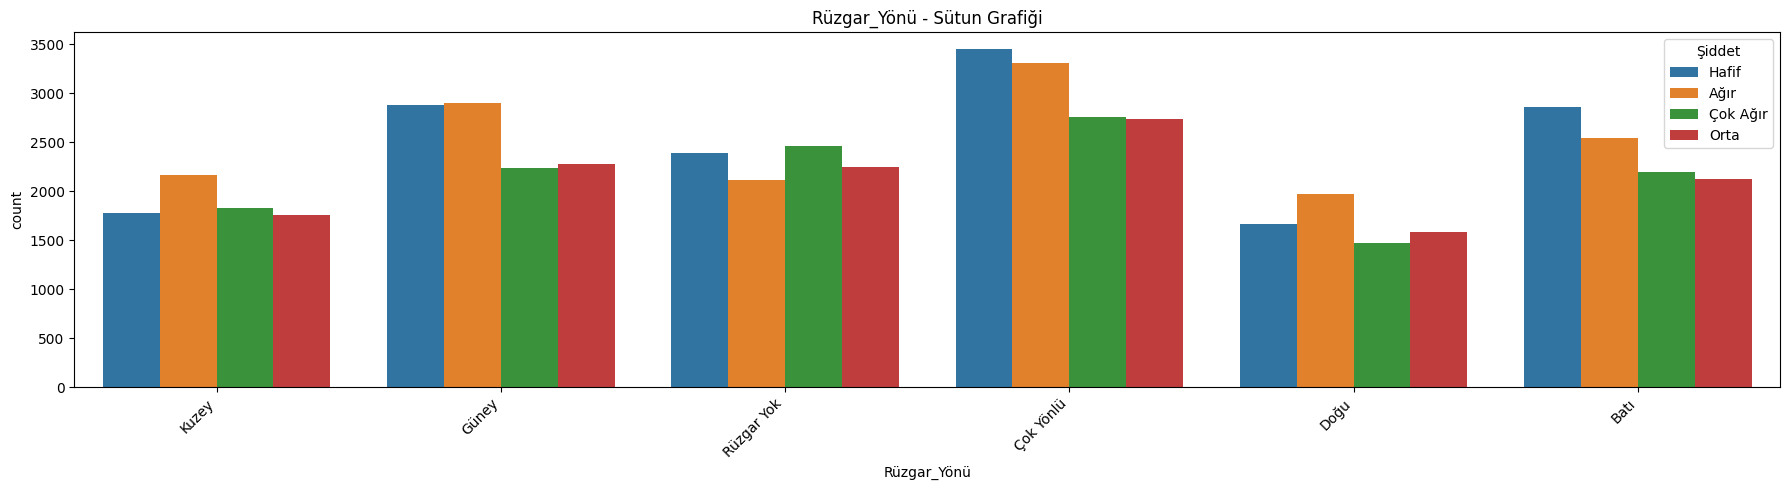

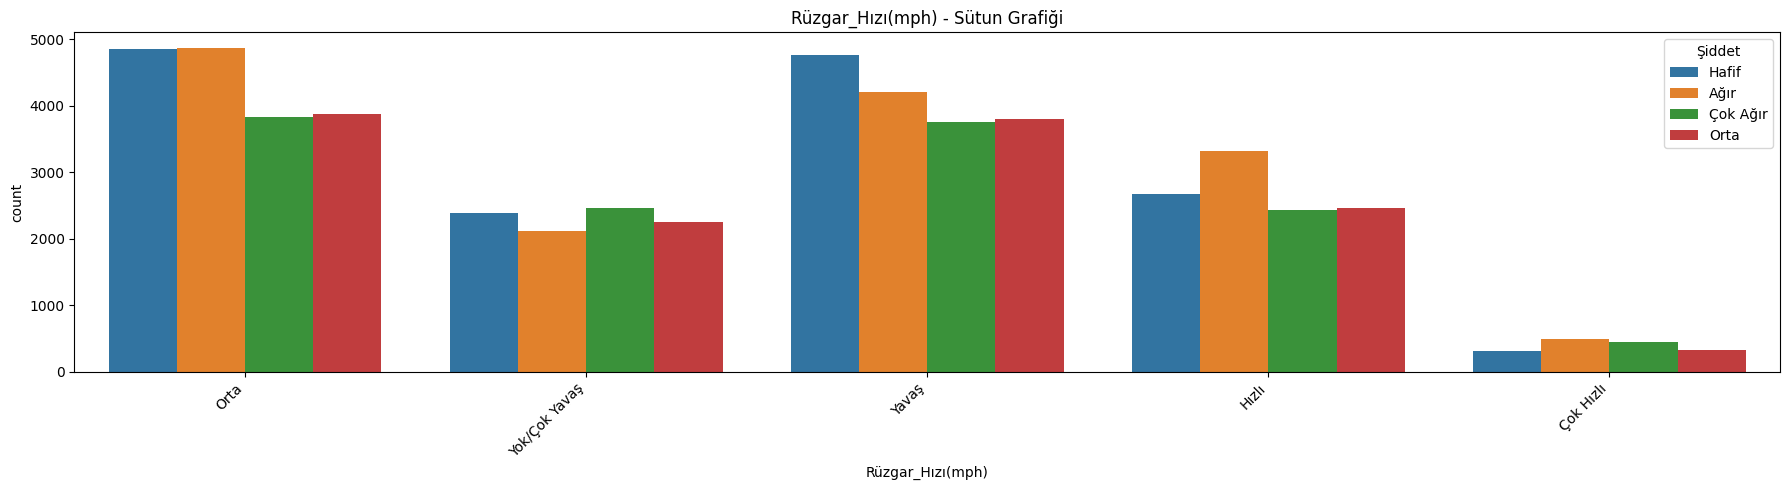

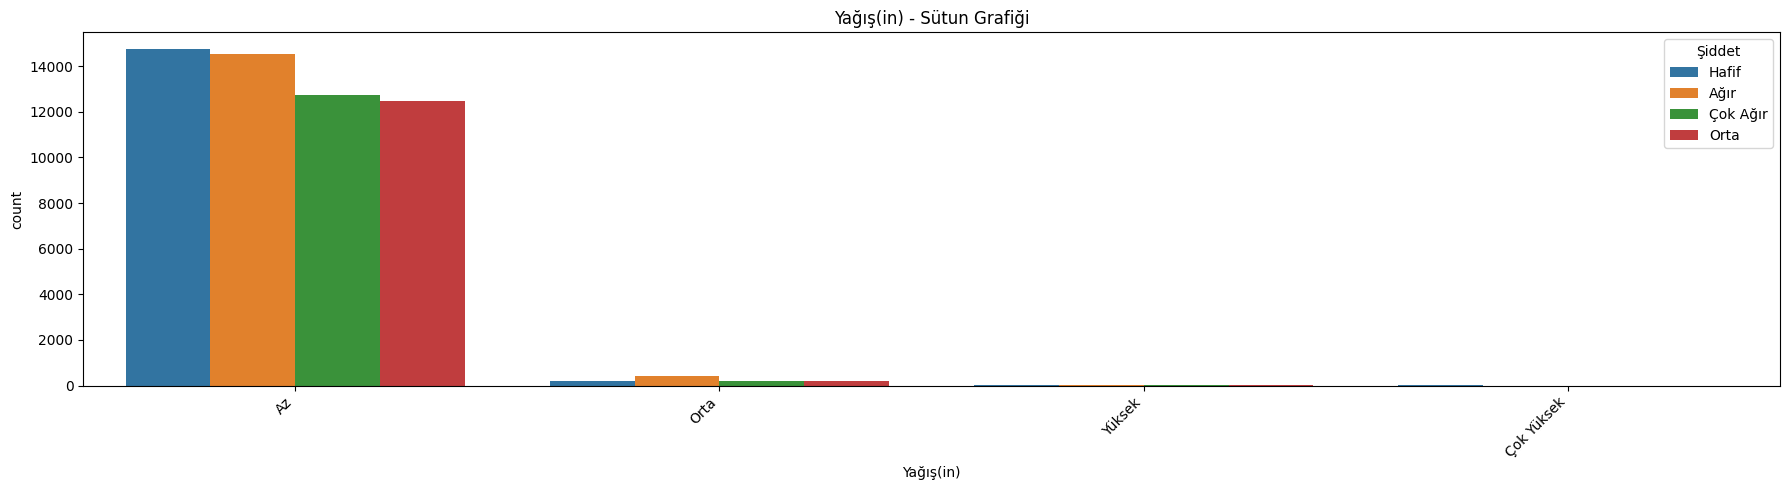

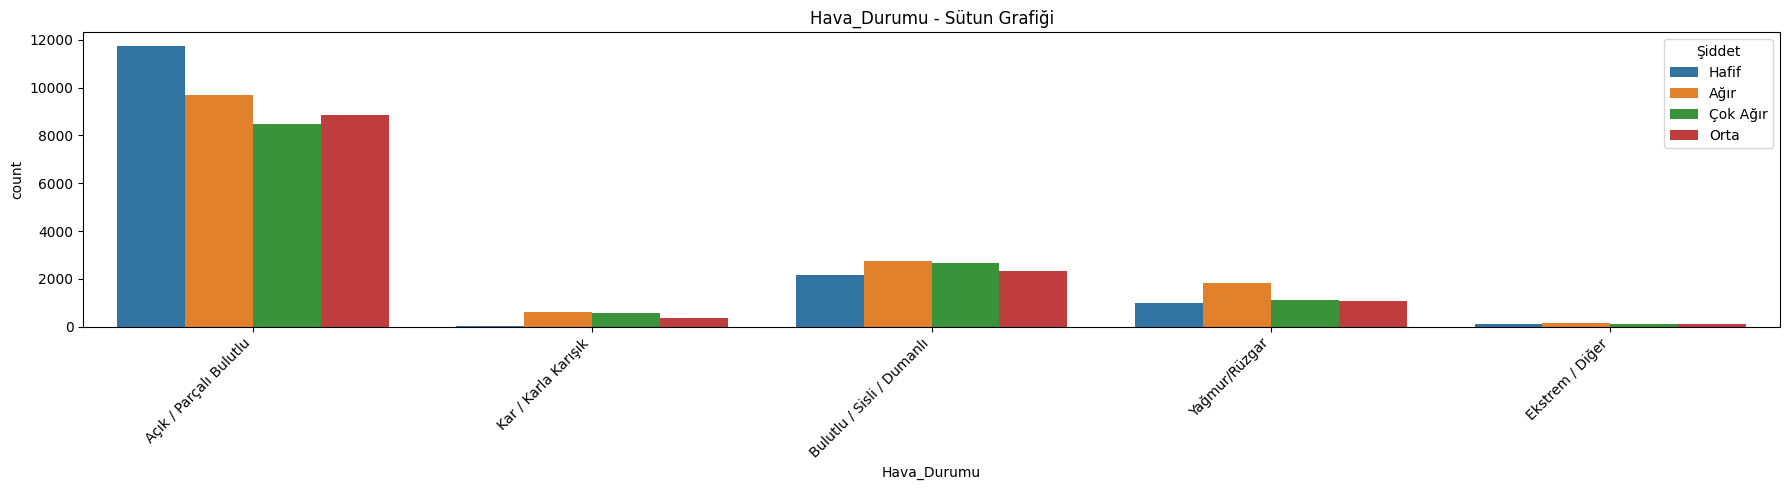

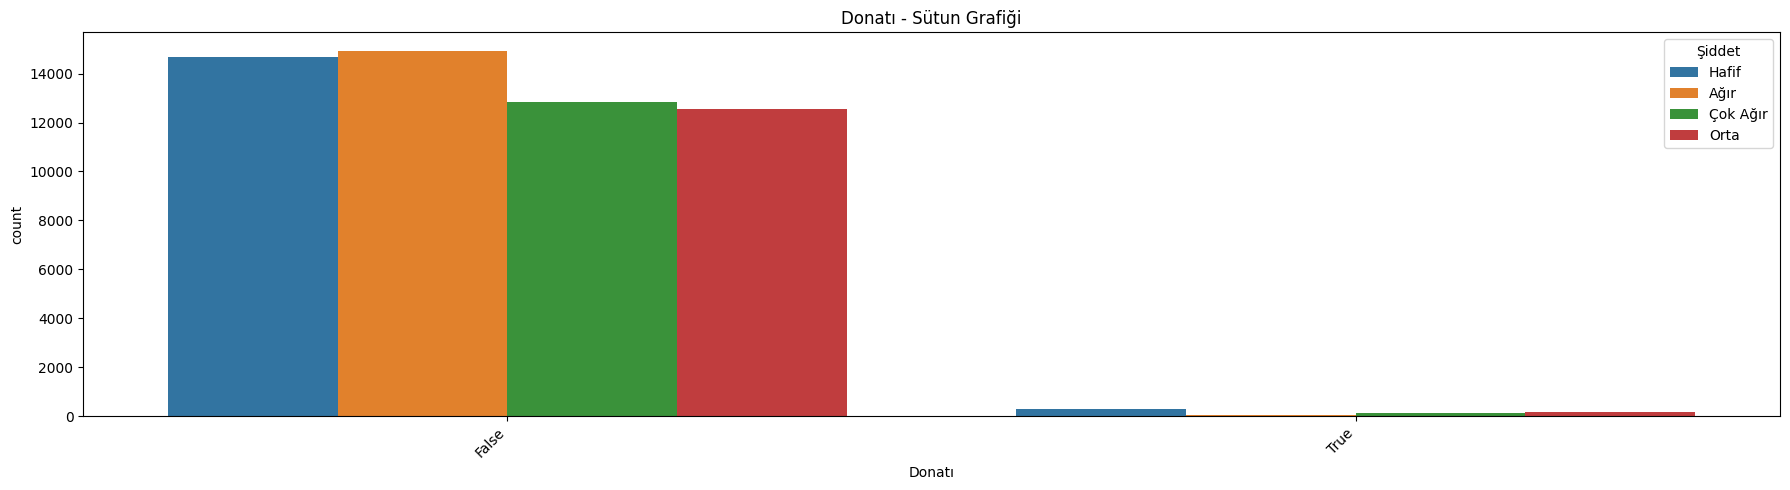

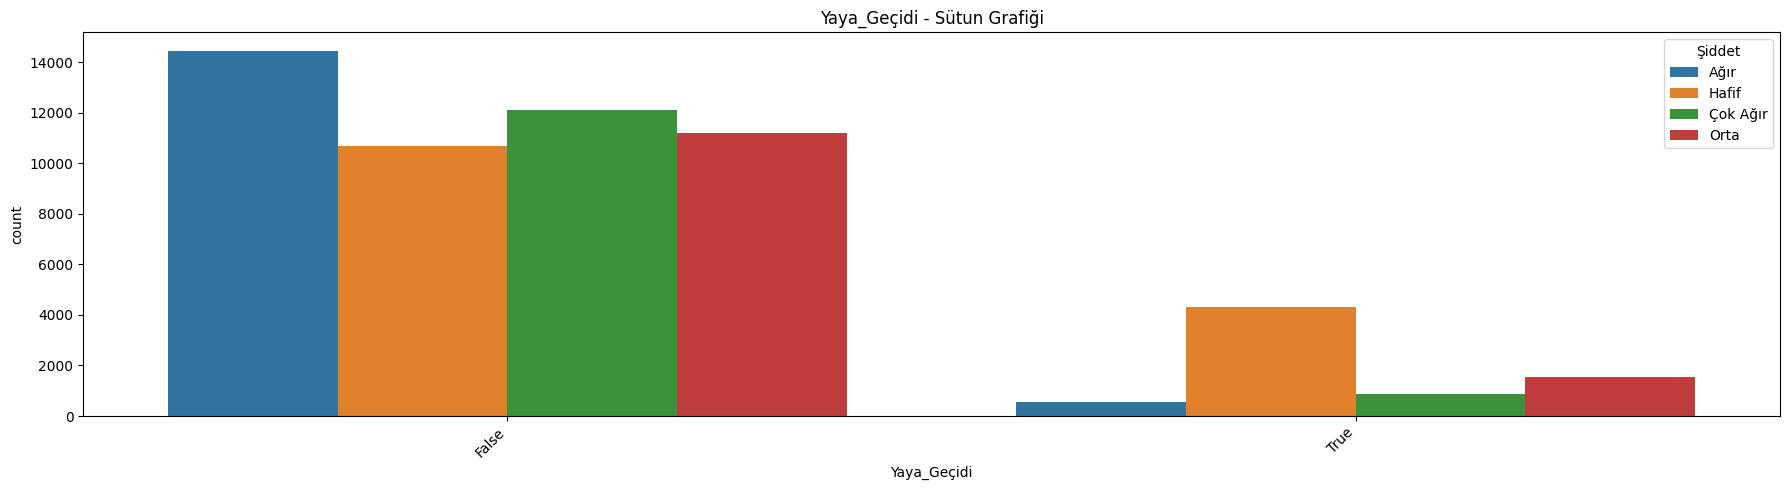

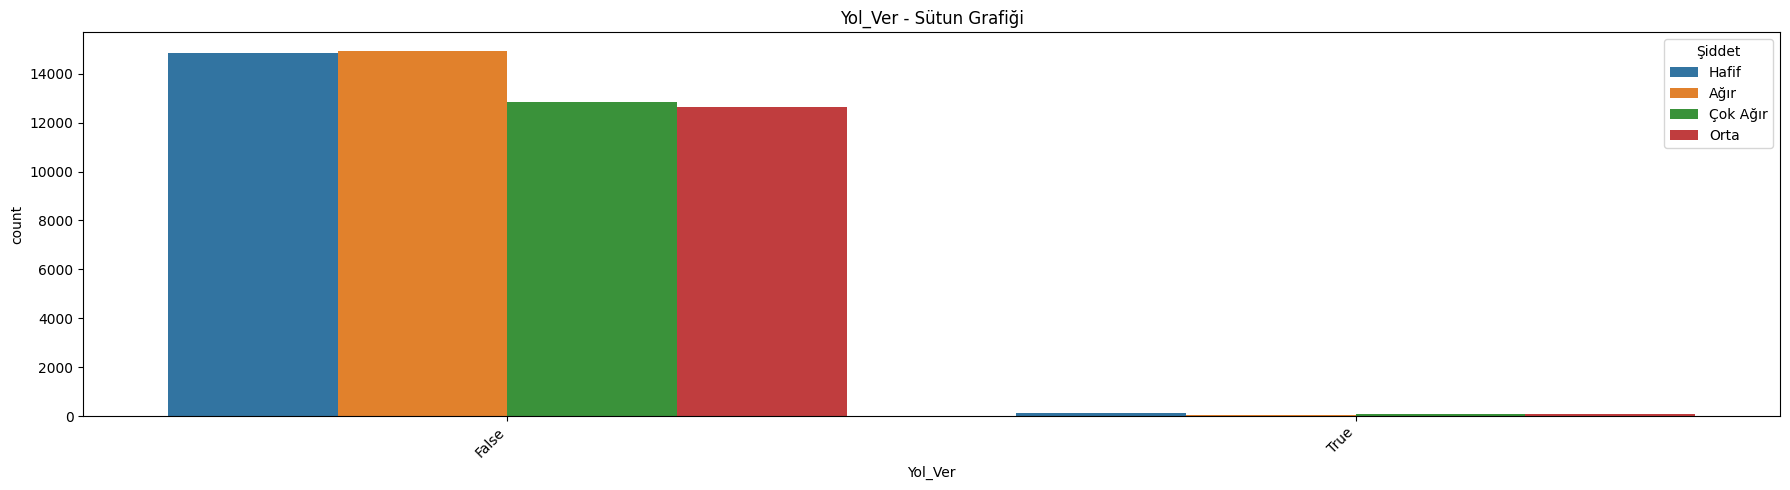

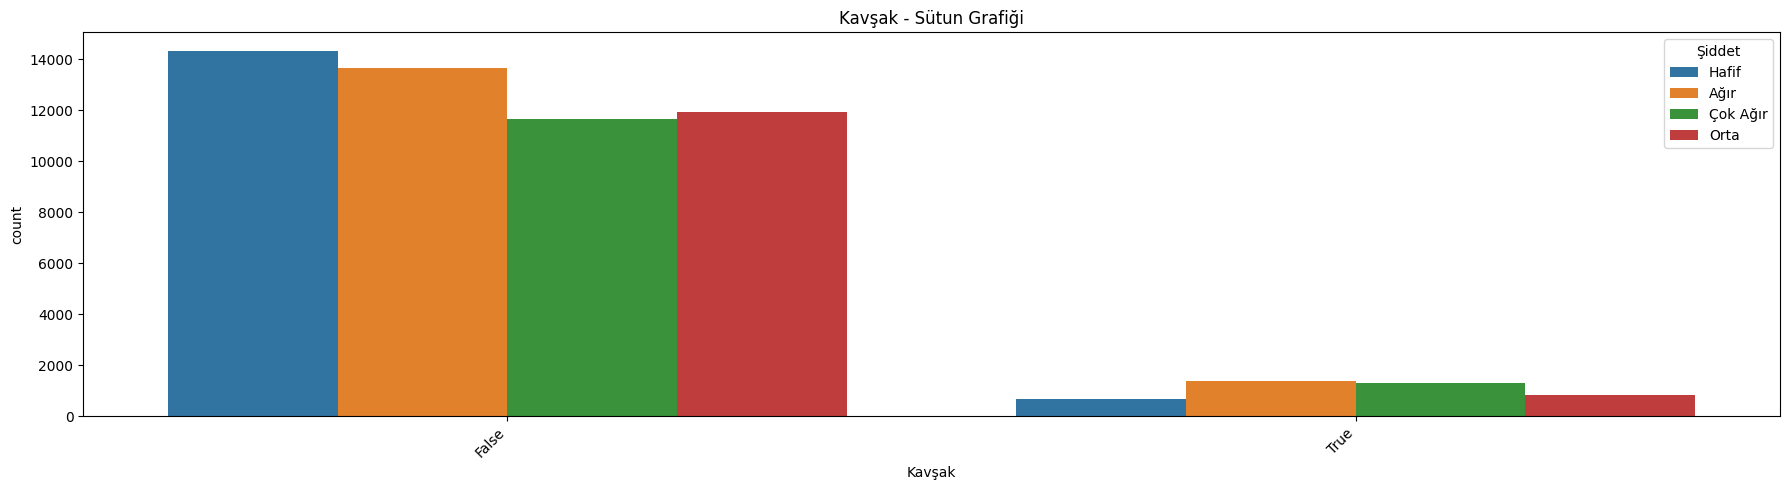

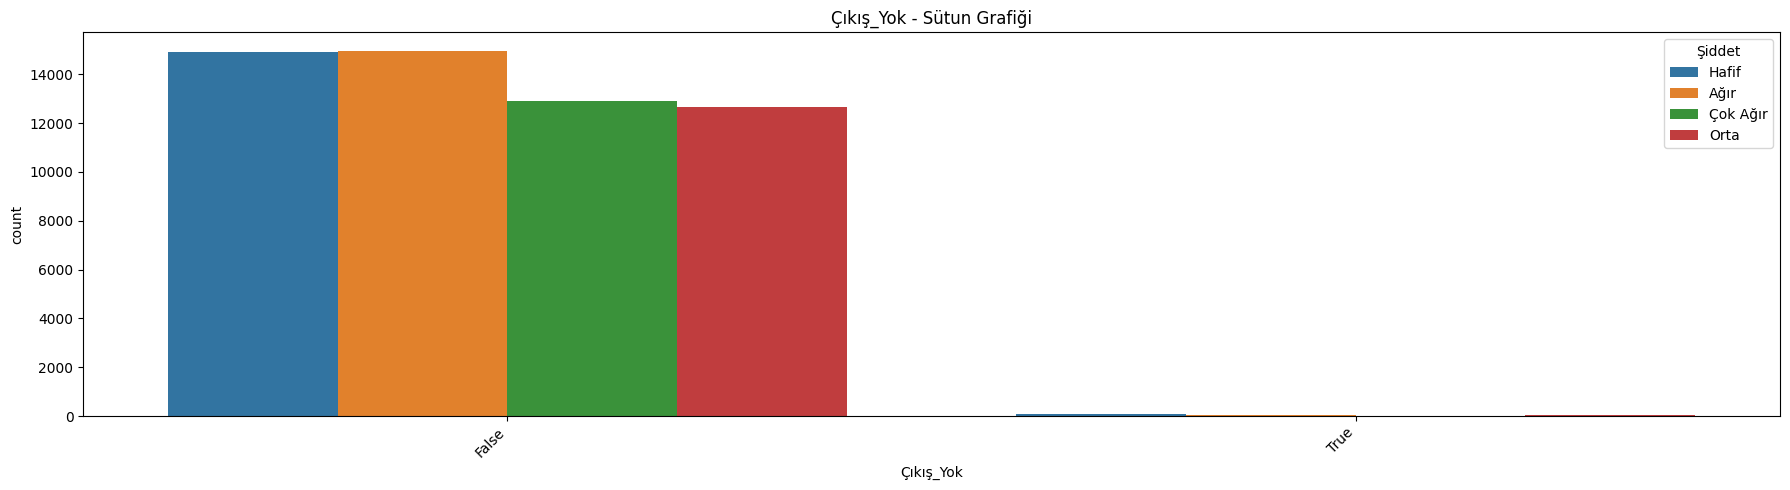

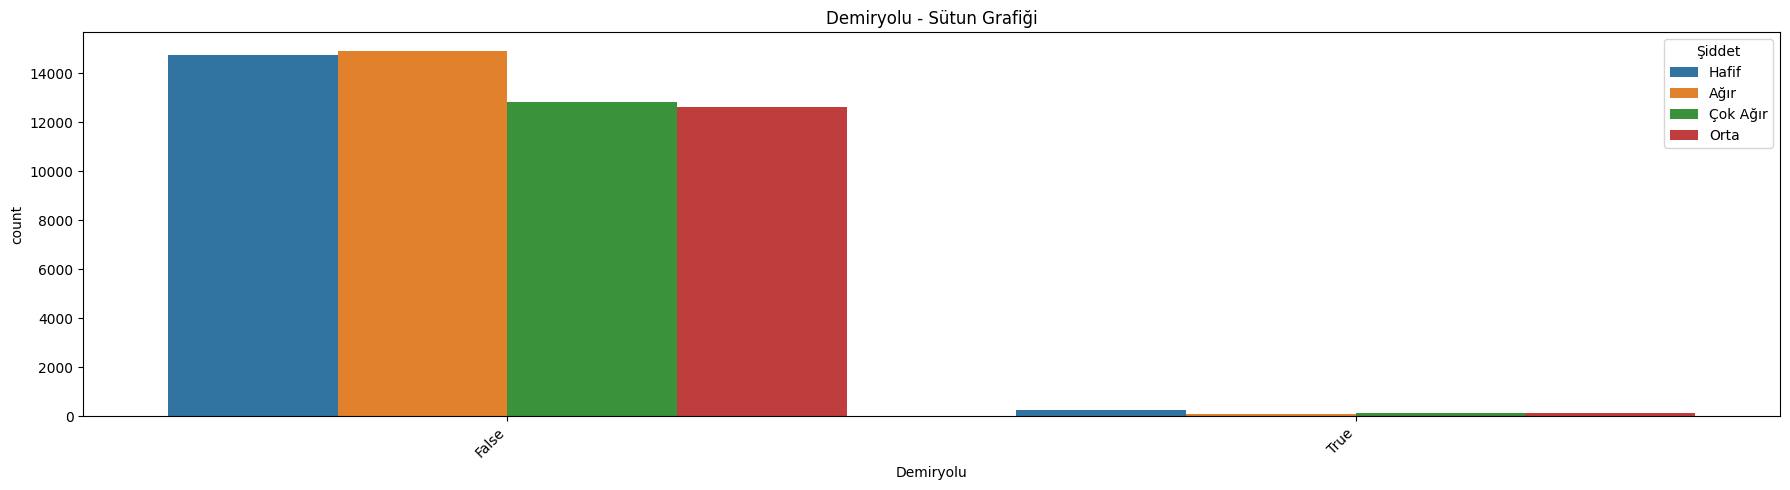

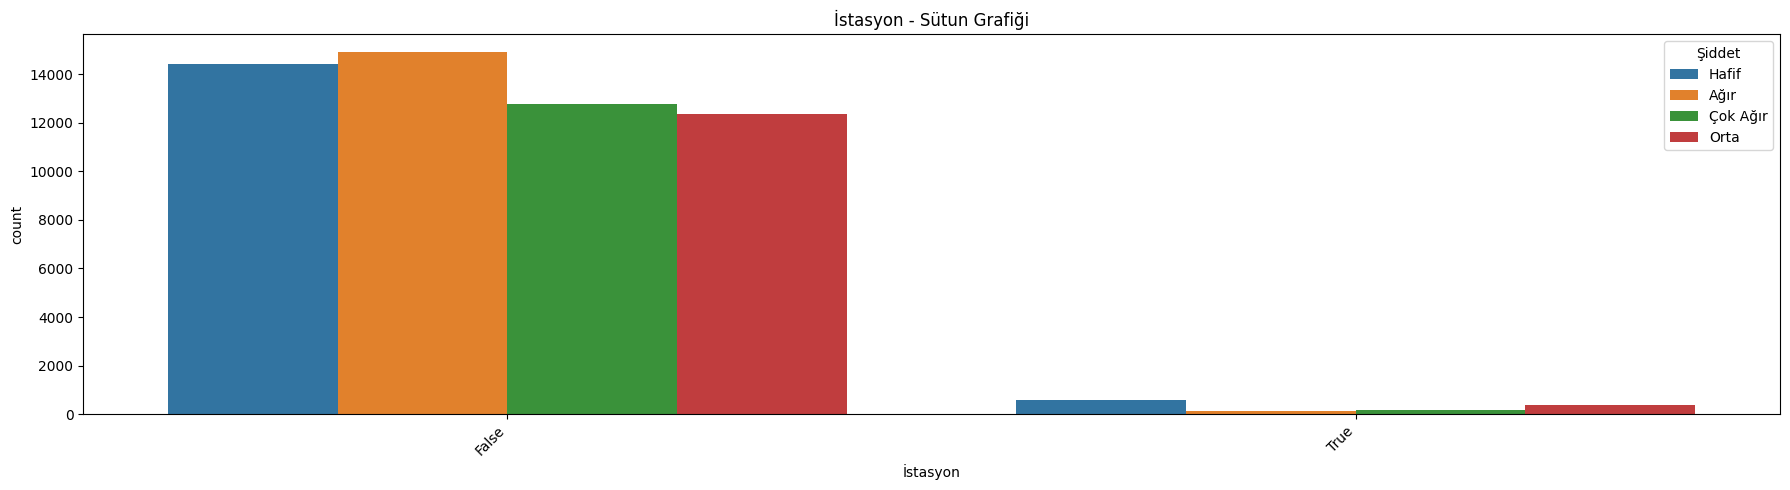

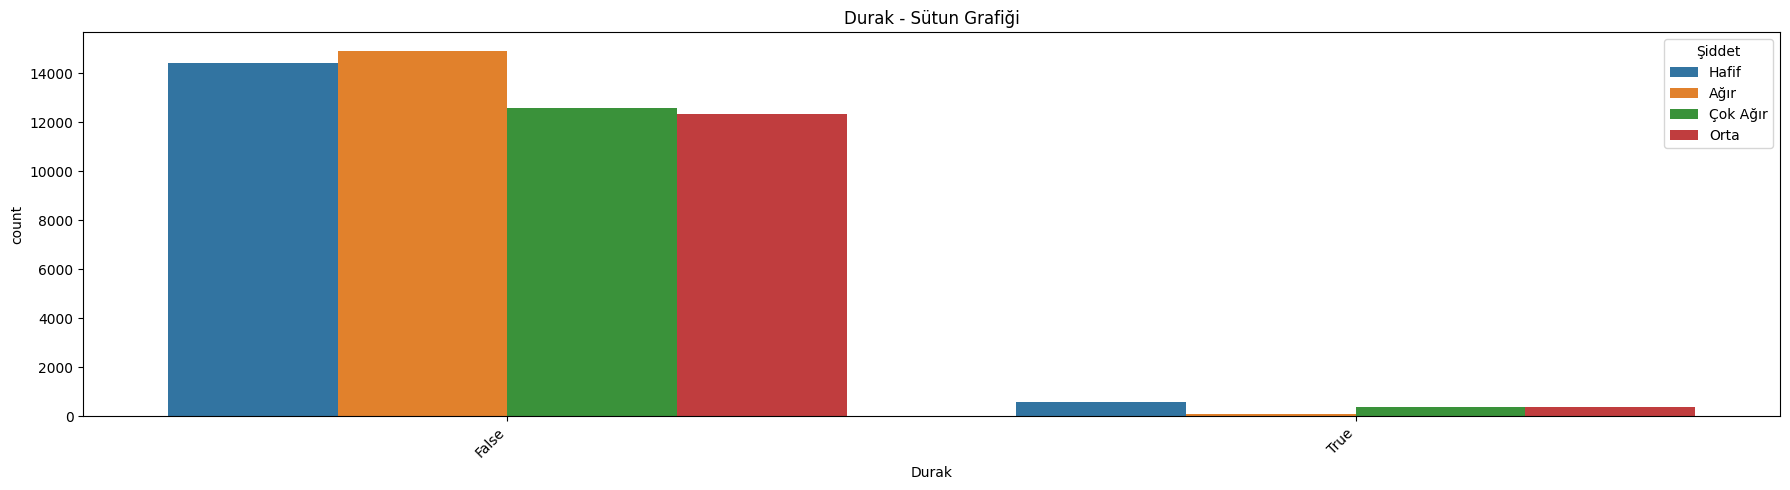

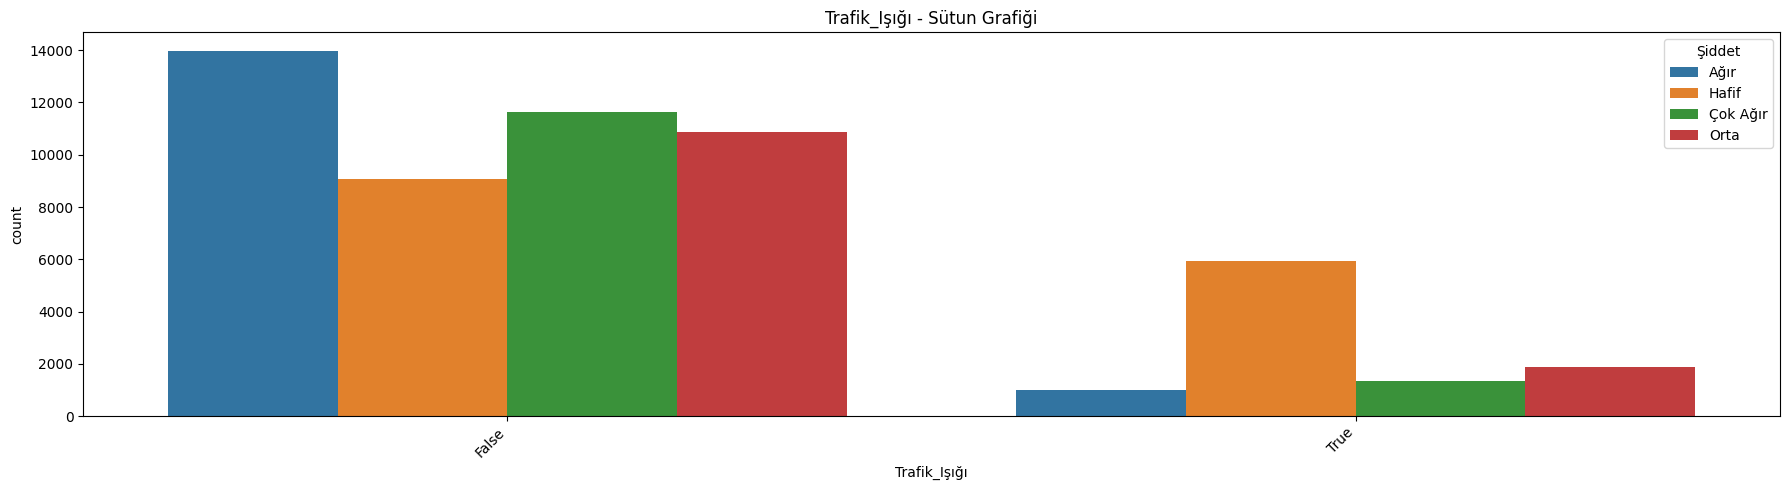

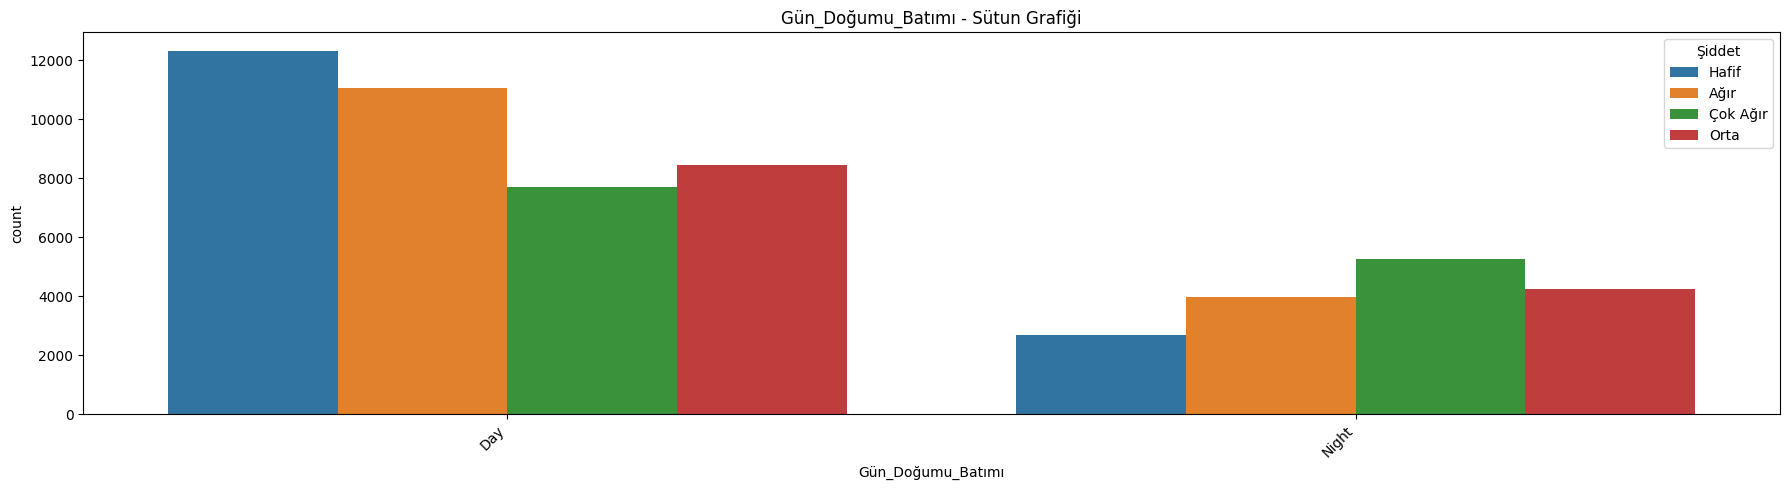

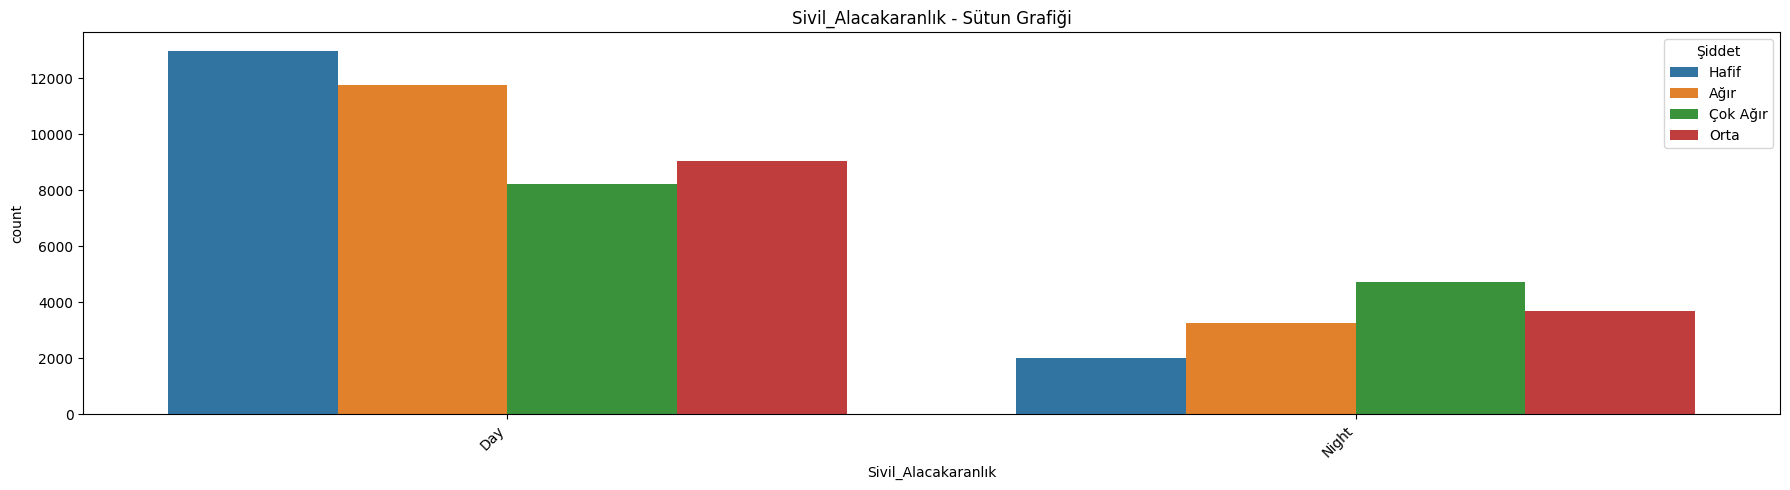

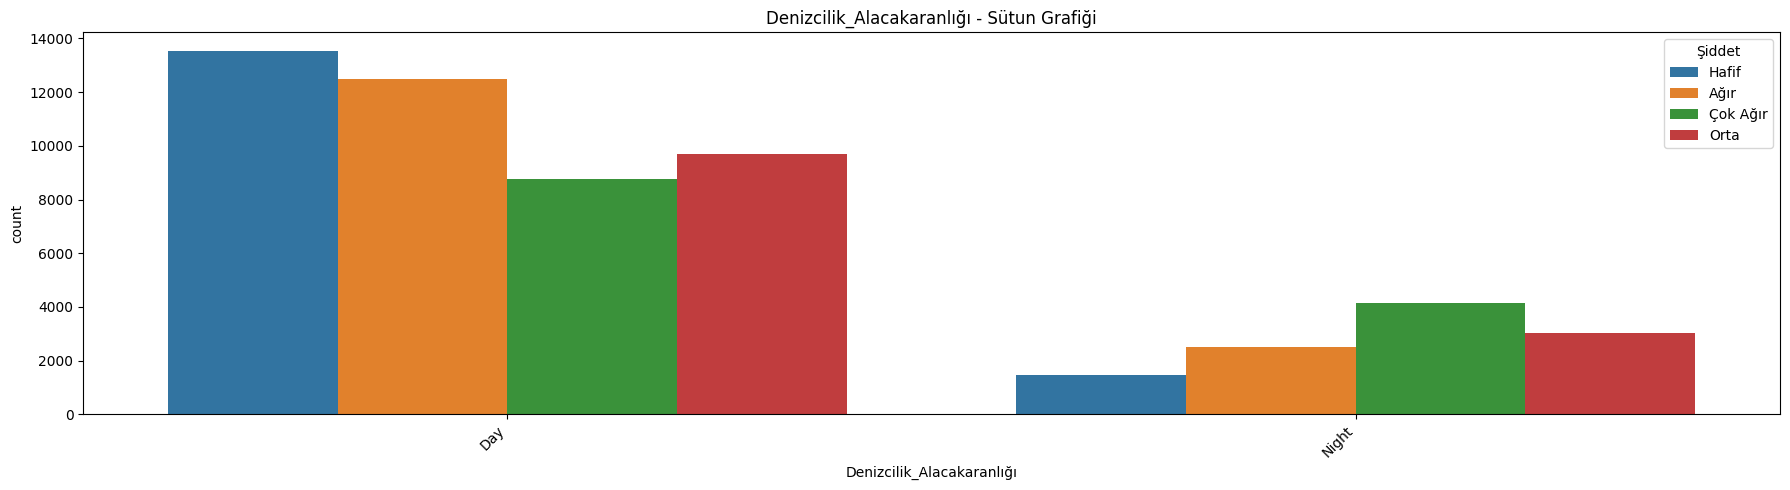

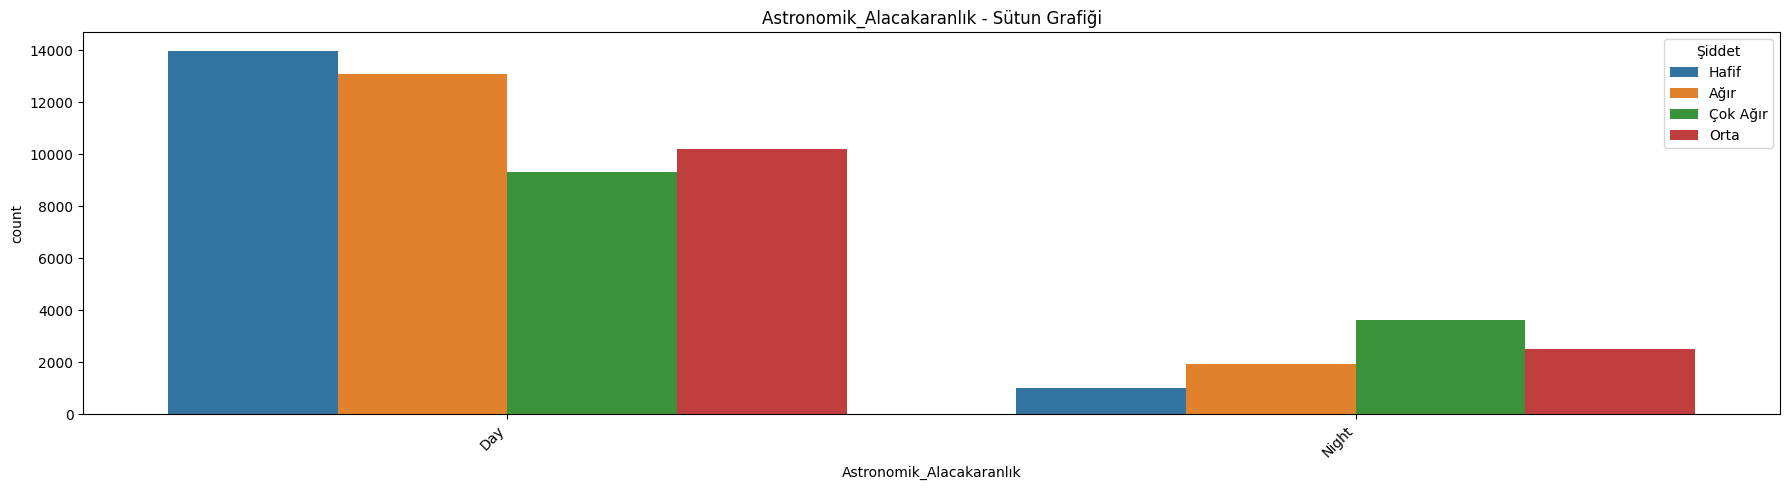

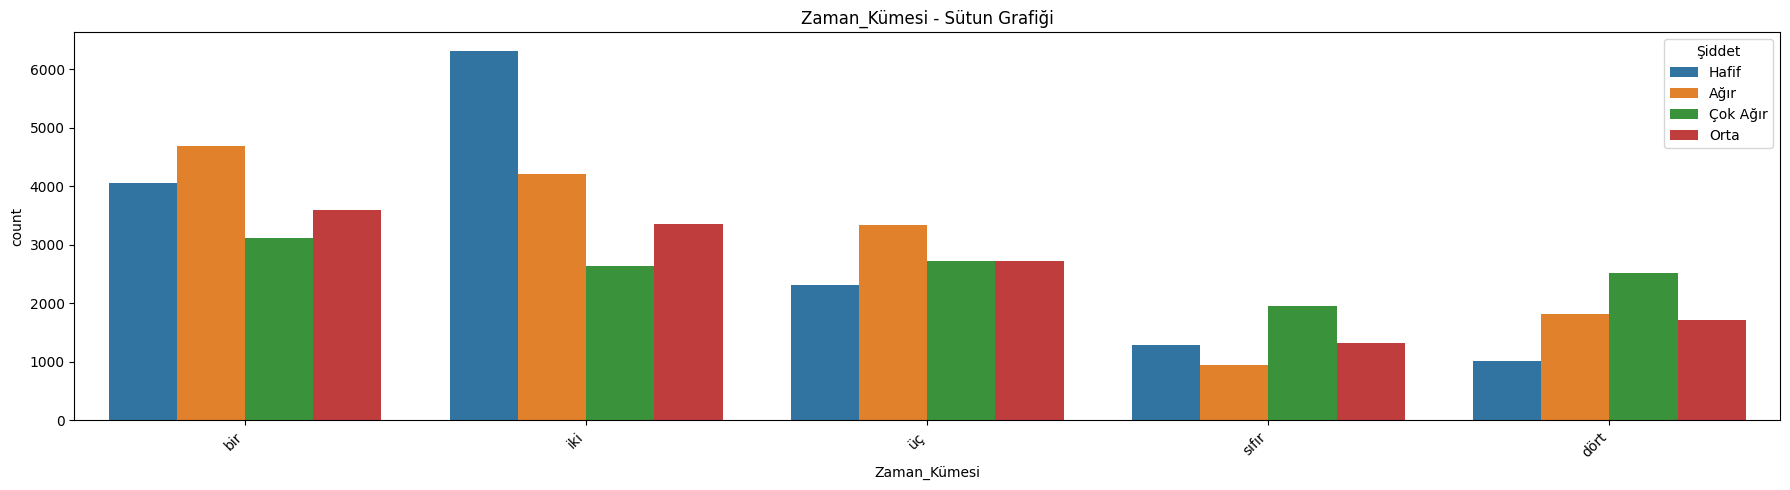

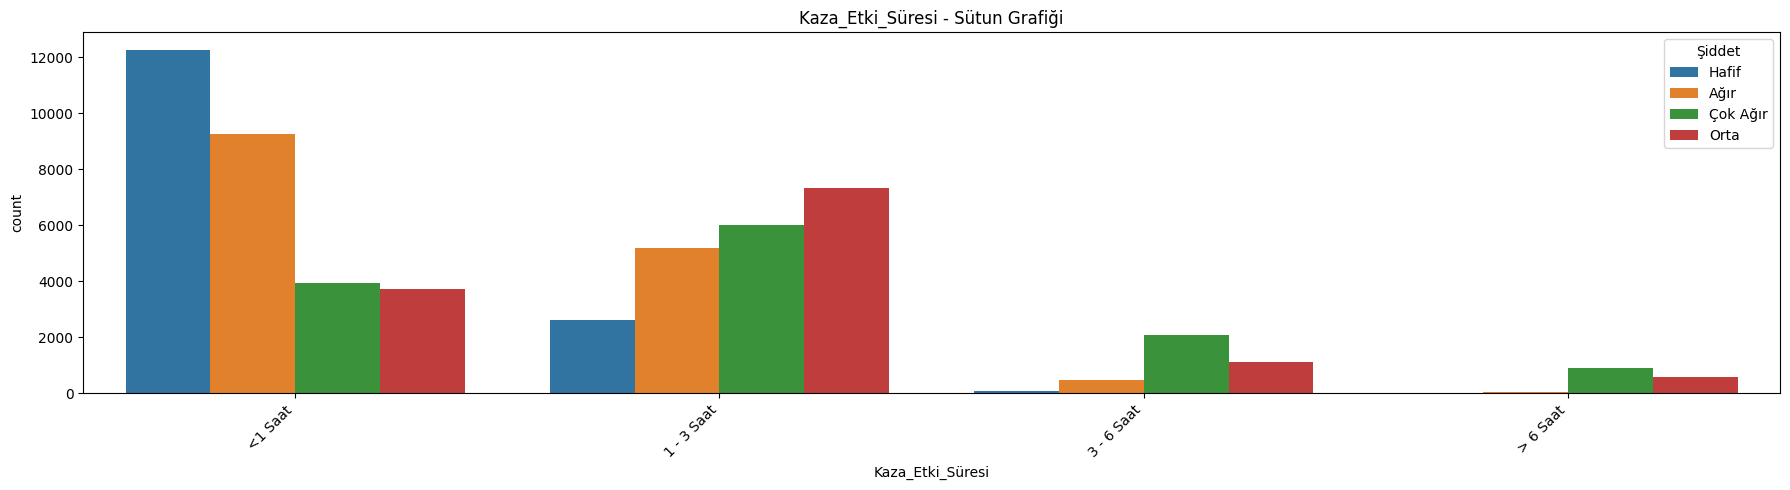

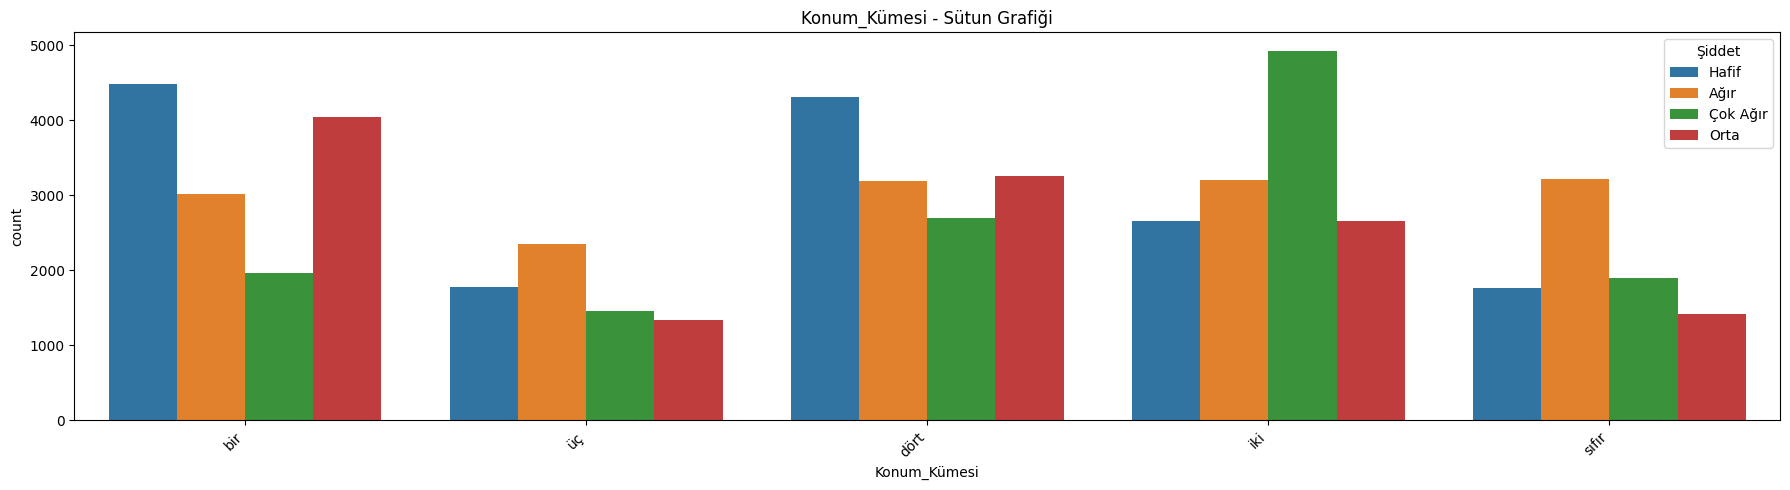

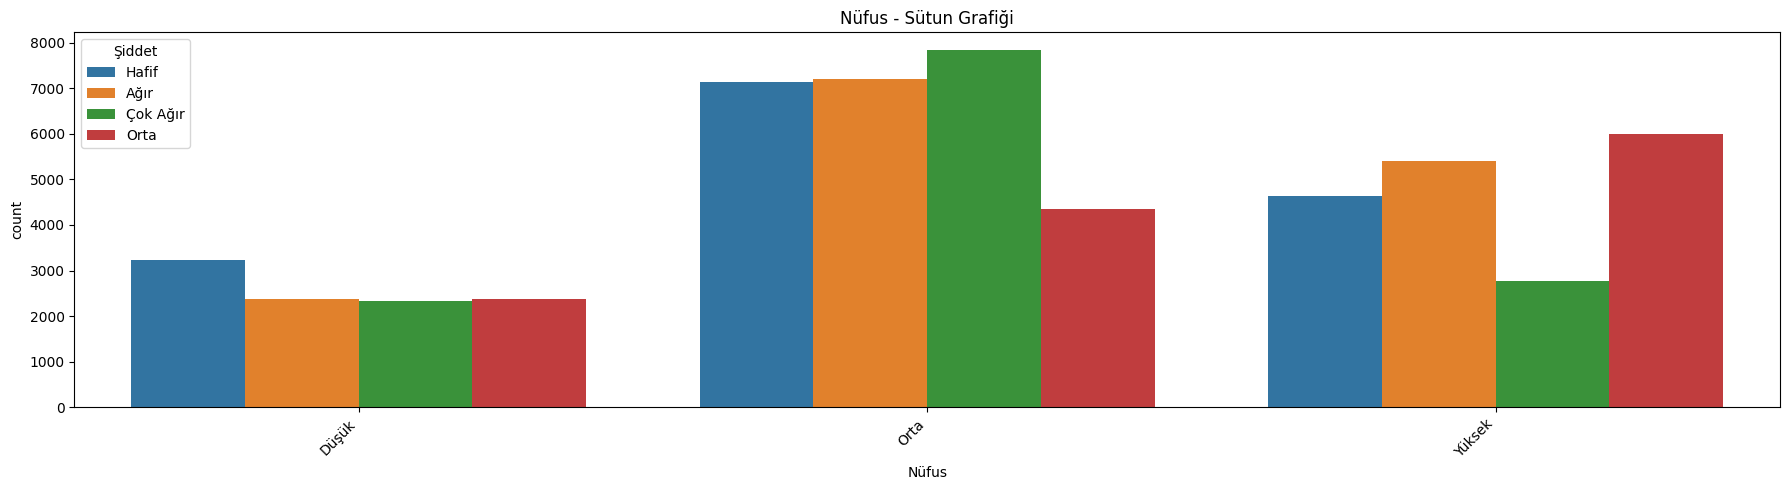

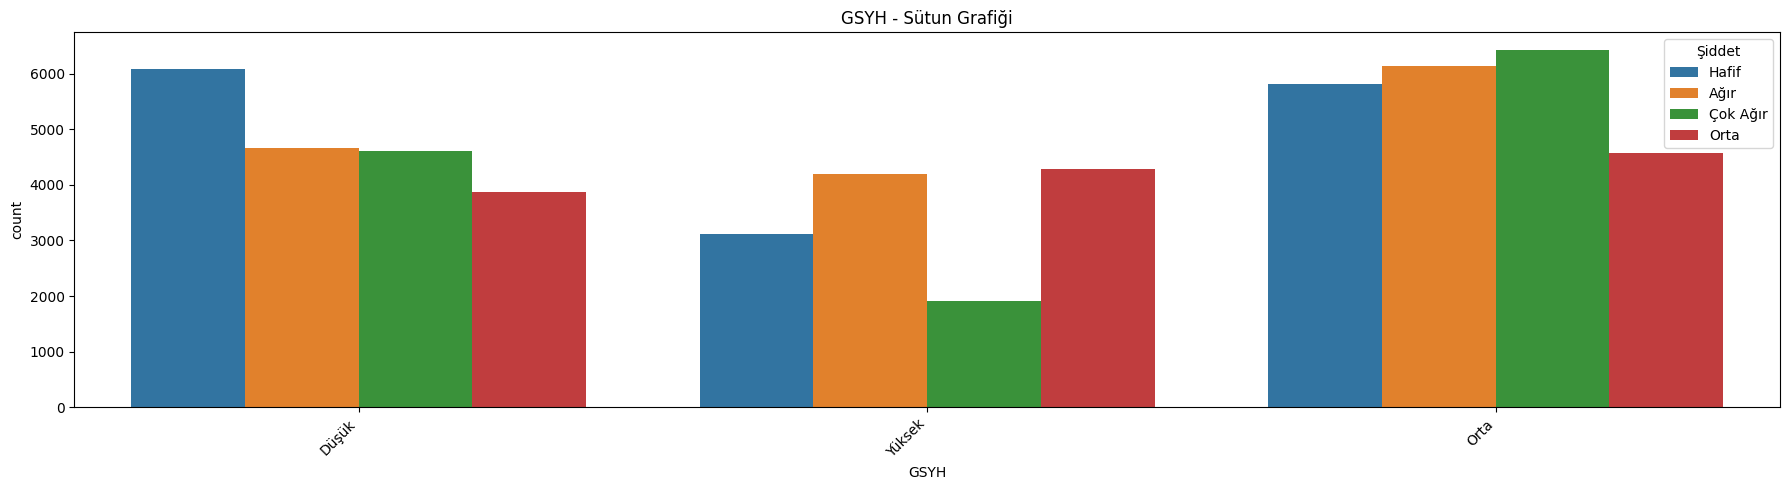

In [42]:
for sutun in df_turkce.columns:
    plt.figure(figsize=(18, 5))

    # Countplot (s√ºtun grafiƒüi)
    plt.subplot(1, 1, 1)
    sns.countplot(data=df_turkce, x=sutun, hue='≈ûiddet')
    plt.title(f'{sutun} - S√ºtun Grafiƒüi')
    plt.xticks(rotation=45, ha='right')


    plt.tight_layout()
    plt.show()

## Etiketlerin Girdilere G√∂re Y√ºzdelik Daƒüƒ±lƒ±mlarƒ±

In [43]:
sonuclar = {}

for sutun in df_turkce.columns:
    yuzde_daƒüƒ±lƒ±m = df_turkce.groupby([sutun, '≈ûiddet']).size().unstack().fillna(0)
    
    yuzde_daƒüƒ±lƒ±m = yuzde_daƒüƒ±lƒ±m.apply(lambda x: 100 * x / x.sum(), axis=1)
       
    sonuclar[sutun] = yuzde_daƒüƒ±lƒ±m
for sutun, sonuc in sonuclar.items():
    print(f"--- {sutun} ---")
    print(sonuc)
    print("\n")

--- Kaynak ---
≈ûiddet        Aƒüƒ±r      Hafif       Orta   √áok Aƒüƒ±r
Kaynak                                             
Source1   6.233866  22.231912  31.507709  40.026512
Source2  50.043222  30.357564  13.870334   5.728880
Source3  30.953926  58.338741  10.058404   0.648929


--- ≈ûiddet ---
≈ûiddet     Aƒüƒ±r  Hafif   Orta  √áok Aƒüƒ±r
≈ûiddet                                 
Aƒüƒ±r      100.0    0.0    0.0       0.0
Hafif       0.0  100.0    0.0       0.0
Orta        0.0    0.0  100.0       0.0
√áok Aƒüƒ±r    0.0    0.0    0.0     100.0


--- Kaza_Uzunluƒüu ---
≈ûiddet              Aƒüƒ±r      Hafif       Orta   √áok Aƒüƒ±r
Kaza_Uzunluƒüu                                            
<10 metre      38.777577  44.718767  14.006267   2.497389
>10 metre      11.423703   3.615359  34.458112  50.502826


--- Zaman_Dilimi ---
≈ûiddet             Aƒüƒ±r      Hafif       Orta   √áok Aƒüƒ±r
Zaman_Dilimi                                            
US/Central    37.327267  23.811931  20.896

## Korelasyon Matrisi

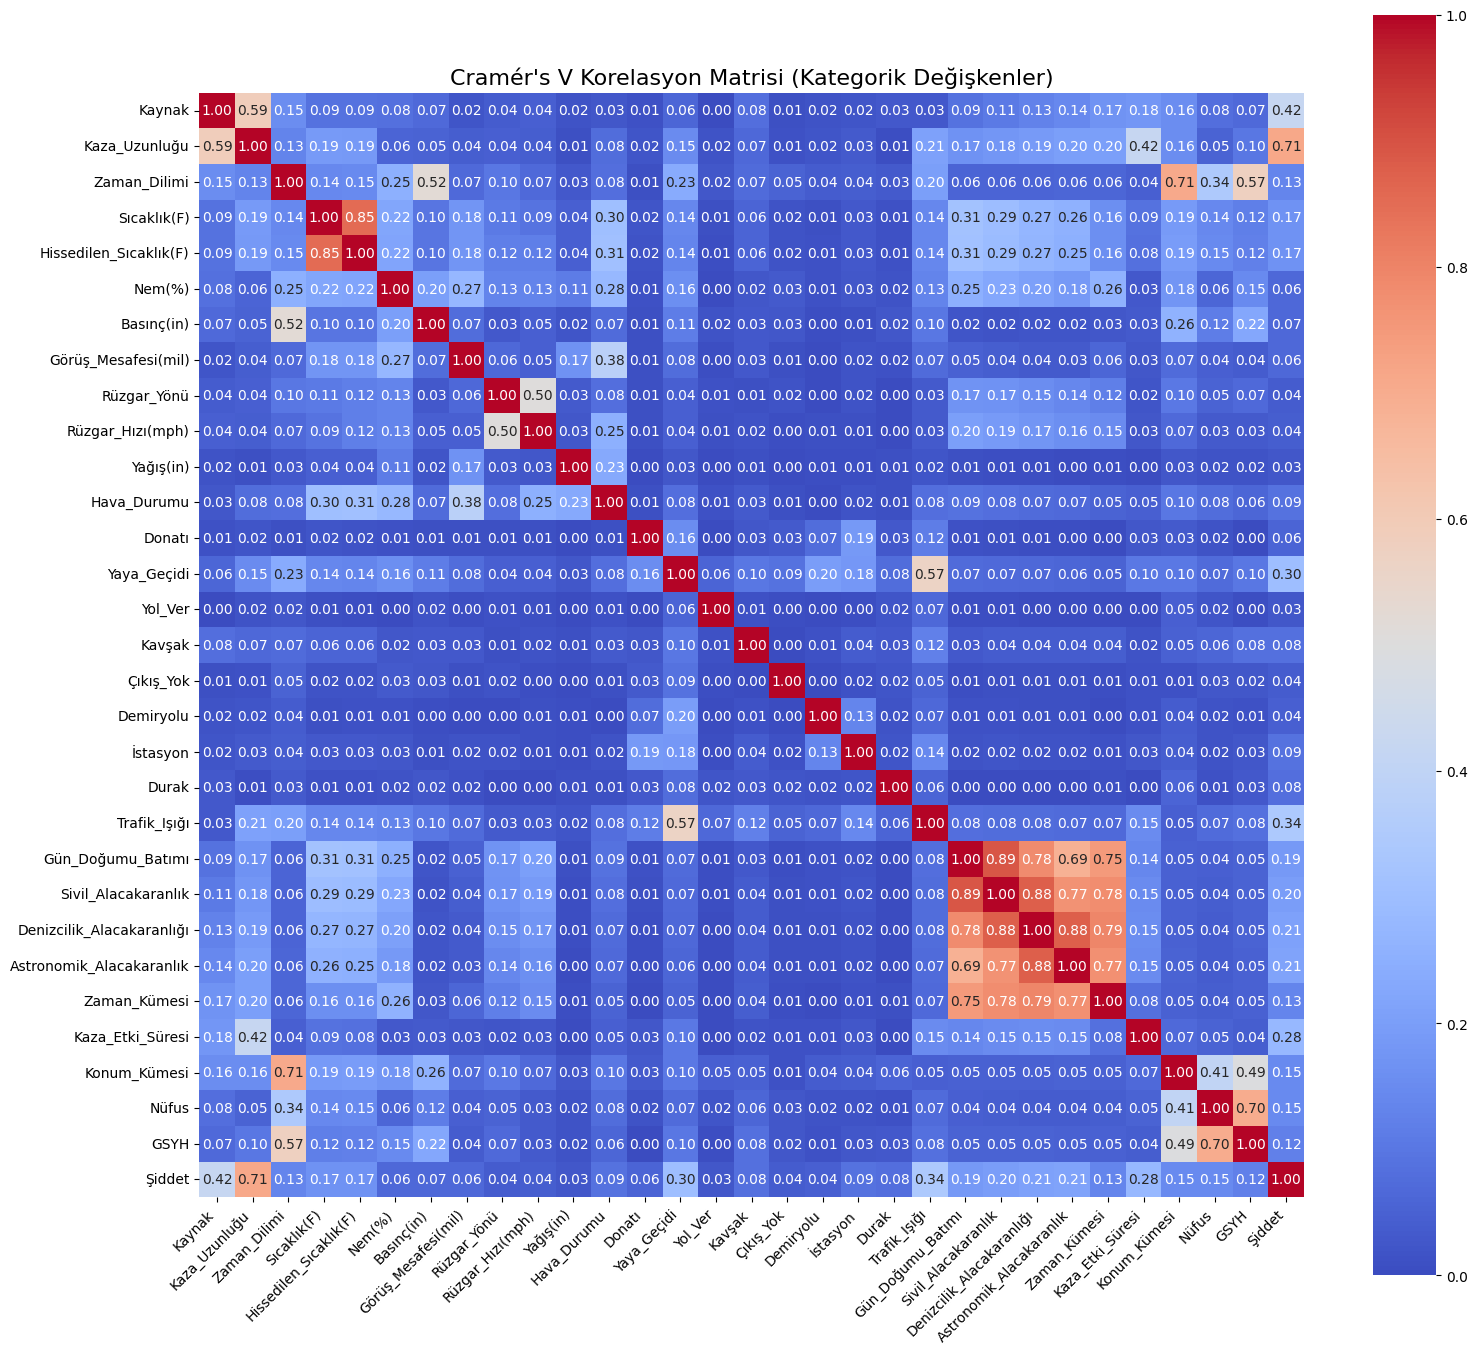

In [44]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))


x_sutunlari = [col for col in df_turkce.columns if col != '≈ûiddet']
tum_sutunlar = x_sutunlari + ['≈ûiddet']

korelasyon_matrisi = pd.DataFrame(index=tum_sutunlar, columns=tum_sutunlar)

for col1 in tum_sutunlar:
    for col2 in tum_sutunlar:
        try:
            korelasyon_matrisi.loc[col1, col2] = cramers_v(df_turkce[col1], df_turkce[col2])
        except:
            korelasyon_matrisi.loc[col1, col2] = np.nan

korelasyon_matrisi = korelasyon_matrisi.astype(float)

plt.figure(figsize=(16, 14))
sns.heatmap(korelasyon_matrisi, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Cram√©r's V Korelasyon Matrisi (Kategorik Deƒüi≈ükenler)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## √ñzellik Se√ßme ve Se√ßilen √ñzelliklere G√∂re Veriyi B√∂lme ƒ∞≈ülemleri

In [45]:
# T√ºm √ñzellikler
X = df_turkce.drop("≈ûiddet", axis=1)
y = df_turkce["≈ûiddet"]

In [46]:
En_Cok5 = [
    "Kaza_Uzunluƒüu",
    "Kaynak",
    "Trafik_I≈üƒ±ƒüƒ±",
    "Yaya_Ge√ßidi",
    "Kaza_Etki_S√ºresi"
]
En_Cok9 = [
    "Kaza_Uzunluƒüu",
    "Kaynak",
    "Trafik_I≈üƒ±ƒüƒ±",
    "Yaya_Ge√ßidi",
    "Kaza_Etki_S√ºresi",
    "Astronomik_Alacakaranlƒ±k",
    "Denizcilik_Alacakaranlƒ±ƒüƒ±",
    "Sivil_Alacakaranlƒ±k",
    "G√ºn_Doƒüumu_Batƒ±mƒ±"
]
En_Cok16 = [
    "Kaza_Uzunluƒüu",
    "Kaynak",
    "Trafik_I≈üƒ±ƒüƒ±",
    "Yaya_Ge√ßidi",
    "Kaza_Etki_S√ºresi",
    "Astronomik_Alacakaranlƒ±k",
    "Denizcilik_Alacakaranlƒ±ƒüƒ±",
    "Sivil_Alacakaranlƒ±k",
    "G√ºn_Doƒüumu_Batƒ±mƒ±",
    "Sƒ±caklƒ±k(F)",
    "Hissedilen_Sƒ±caklƒ±k(F)",
    "Konum_K√ºmesi",
    "N√ºfus",
    "Zaman_K√ºmesi",
    "Zaman_Dilimi",
    "GSYH"   
]

X_matrise_gore_5 = df_turkce[En_Cok5].copy()
X_matrise_gore_9 = df_turkce[En_Cok9].copy()
X_matrise_gore_16 = df_turkce[En_Cok16].copy()

In [47]:
label_encoder = LabelEncoder()
for s√ºtun in X.columns:
    if X[s√ºtun].dtype == 'object' or X[s√ºtun].dtype.name == 'category':
        X[s√ºtun] = label_encoder.fit_transform(X[s√ºtun])

for s√ºtun in X_matrise_gore_5.columns:
    if X_matrise_gore_5[s√ºtun].dtype == 'object' or X_matrise_gore_5[s√ºtun].dtype.name == 'category':
        X_matrise_gore_5[s√ºtun] = label_encoder.fit_transform(X_matrise_gore_5[s√ºtun])

for s√ºtun in X_matrise_gore_9.columns:
    if X_matrise_gore_9[s√ºtun].dtype == 'object' or X_matrise_gore_9[s√ºtun].dtype.name == 'category':
        X_matrise_gore_9[s√ºtun] = label_encoder.fit_transform(X_matrise_gore_9[s√ºtun])

for s√ºtun in X_matrise_gore_16.columns:
    if X_matrise_gore_16[s√ºtun].dtype == 'object' or X_matrise_gore_16[s√ºtun].dtype.name == 'category':
        X_matrise_gore_16[s√ºtun] = label_encoder.fit_transform(X_matrise_gore_16[s√ºtun])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train_5, X_test_5, y_train5, y_test5 = train_test_split(
    X_matrise_gore_5, y, test_size=0.25, random_state=42, stratify=y
)

X_train_9, X_test_9, y_train9, y_test9 = train_test_split(
    X_matrise_gore_9, y, test_size=0.25, random_state=42, stratify=y
)
X_train_16, X_test_16, y_train16, y_test16 = train_test_split(
    X_matrise_gore_16, y, test_size=0.25, random_state=42, stratify=y
)

In [49]:
from sklearn.feature_selection import SelectKBest, chi2
selector_chi2 = SelectKBest(score_func=chi2, k=8) 
selector_chi2.fit(X_train, y_train)

secilen_indeksler = selector_chi2.get_support(indices=True)
secilen_sutunlar = X_train.columns[secilen_indeksler]

print("Chi2 ile se√ßilen 8 √∂zellik:")
print(secilen_sutunlar)

selector_chi2_2 = SelectKBest(score_func=chi2, k=16) 
selector_chi2_2.fit(X_train, y_train)

secilen_indeksler2 = selector_chi2_2.get_support(indices=True)
secilen_sutunlar2 = X_train.columns[secilen_indeksler2]

print("Chi2 ile se√ßilen 16  √∂zellik:")
print(secilen_sutunlar2)

Chi2 ile se√ßilen 8 √∂zellik:
Index(['Kaynak', 'Kaza_Uzunluƒüu', 'Hava_Durumu', 'Yaya_Ge√ßidi', 'Trafik_I≈üƒ±ƒüƒ±',
       'Denizcilik_Alacakaranlƒ±ƒüƒ±', 'Astronomik_Alacakaranlƒ±k',
       'Kaza_Etki_S√ºresi'],
      dtype='object')
Chi2 ile se√ßilen 16  √∂zellik:
Index(['Kaynak', 'Kaza_Uzunluƒüu', 'Zaman_Dilimi', 'Sƒ±caklƒ±k(F)',
       'Hissedilen_Sƒ±caklƒ±k(F)', 'Hava_Durumu', 'Yaya_Ge√ßidi', 'ƒ∞stasyon',
       'Trafik_I≈üƒ±ƒüƒ±', 'G√ºn_Doƒüumu_Batƒ±mƒ±', 'Sivil_Alacakaranlƒ±k',
       'Denizcilik_Alacakaranlƒ±ƒüƒ±', 'Astronomik_Alacakaranlƒ±k',
       'Kaza_Etki_S√ºresi', 'Konum_K√ºmesi', 'GSYH'],
      dtype='object')


In [50]:
chi2_8 = [
    "Kaynak",
    "Kaza_Uzunluƒüu", 
    "Hava_Durumu",
    "Yaya_Ge√ßidi", 
    "Trafik_I≈üƒ±ƒüƒ±", 
    "Denizcilik_Alacakaranlƒ±ƒüƒ±", 
    "Astronomik_Alacakaranlƒ±k", 
    "Kaza_Etki_S√ºresi"
  
]
chi2_16 = [
    "Kaynak",
    "Kaza_Uzunluƒüu",  
    "Zaman_Dilimi", 
    "Sƒ±caklƒ±k(F)", 
    "Hissedilen_Sƒ±caklƒ±k(F)", 
    "Hava_Durumu",
    "Yaya_Ge√ßidi",
    "ƒ∞stasyon", 
    "Trafik_I≈üƒ±ƒüƒ±", 
    "G√ºn_Doƒüumu_Batƒ±mƒ±", 
    "Sivil_Alacakaranlƒ±k", 
    "Denizcilik_Alacakaranlƒ±ƒüƒ±",
    "Astronomik_Alacakaranlƒ±k",
    "Kaza_Etki_S√ºresi", 
    "Konum_K√ºmesi", 
    "GSYH" 

]

X_chi2_8 = df_turkce[chi2_8].copy()
X_chi2_16 = df_turkce[chi2_16].copy()

for s√ºtun in X_chi2_8.columns:
    if X_chi2_8[s√ºtun].dtype == 'object' or X_chi2_8[s√ºtun].dtype.name == 'category':
        X_chi2_8[s√ºtun] = label_encoder.fit_transform(X_chi2_8[s√ºtun])

for s√ºtun in X_chi2_16.columns:
    if X_chi2_16[s√ºtun].dtype == 'object' or X_chi2_16[s√ºtun].dtype.name == 'category':
        X_chi2_16[s√ºtun] = label_encoder.fit_transform(X_chi2_16[s√ºtun])

X_train_chi2_8, X_test_chi2_8, y_train_chi2_8, y_test_chi2_8 = train_test_split(
    X_chi2_8, y, test_size=0.25, random_state=42, stratify=y
)
X_train_chi2_16, X_test_chi2_16, y_train_chi2_16, y_test_chi2_16 = train_test_split(
    X_chi2_16, y, test_size=0.25, random_state=42, stratify=y
)

## Se√ßilen √ñzellik Gruplarƒ±ndan Hangisi Daha ƒ∞yi Test Ediyoruz

In [51]:
modeller = {
    "Naive Bayes": GaussianNB(),
    "Karar Aƒüacƒ±": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Yapay Sinir Aƒüƒ±": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

veri_kumeleri = {
    "Orijinal": (X_train, X_test, y_train, y_test),
    "5 √ñzellik": (X_train_5, X_test_5, y_train5, y_test5),
    "9 √ñzellik": (X_train_9, X_test_9, y_train9, y_test9),
    "16 √ñzellik": (X_train_16, X_test_16, y_train16, y_test16),
    "Chi2 - 8 √ñzellik": (X_train_chi2_8, X_test_chi2_8, y_train_chi2_8, y_test_chi2_8),
    "Chi2 - 16 √ñzellik": (X_train_chi2_16, X_test_chi2_16, y_train_chi2_16, y_test_chi2_16)
}

for veri_adi, (X_tr, X_te, y_tr, y_te) in veri_kumeleri.items():
    print(f"\nüìÅ Veri K√ºmesi: {veri_adi}")
    print("=" * 60)
    
    for model_adi, model in modeller.items():
        print(f"\nüìå Model: {model_adi}\n" + "-" * 40)
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)

        accuracy = accuracy_score(y_te, y_pred)
        precision = precision_score(y_te, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_te, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_te, y_pred, average='weighted', zero_division=0)

        print(f"‚úÖ Doƒüruluk (Accuracy): {accuracy:.4f}")
        print(f"üéØ Keskinlik (Precision): {precision:.4f}")
        print(f"üîç Duyarlƒ±lƒ±k (Recall): {recall:.4f}")
        print(f"üìä F1 Skoru: {f1:.4f}")
        print("\nüìã Sƒ±nƒ±f Bazlƒ± Rapor:\n")
        print(classification_report(y_te, y_pred, zero_division=0))
        print("-" * 50)
    print("=" * 60 + "\n")


üìÅ Veri K√ºmesi: Orijinal

üìå Model: Naive Bayes
----------------------------------------
‚úÖ Doƒüruluk (Accuracy): 0.5560
üéØ Keskinlik (Precision): 0.5684
üîç Duyarlƒ±lƒ±k (Recall): 0.5560
üìä F1 Skoru: 0.5205

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

              precision    recall  f1-score   support

        Aƒüƒ±r       0.51      0.85      0.63      3750
       Hafif       0.69      0.43      0.53      3750
        Orta       0.49      0.16      0.25      3179
    √áok Aƒüƒ±r       0.57      0.75      0.65      3236

    accuracy                           0.56     13915
   macro avg       0.57      0.55      0.51     13915
weighted avg       0.57      0.56      0.52     13915

--------------------------------------------------

üìå Model: Karar Aƒüacƒ±
----------------------------------------
‚úÖ Doƒüruluk (Accuracy): 0.5929
üéØ Keskinlik (Precision): 0.5922
üîç Duyarlƒ±lƒ±k (Recall): 0.5929
üìä F1 Skoru: 0.5924

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

              precision    recall  f1-

In [55]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_param = {'max_depth': [3, 7, None], 'criterion': ['gini', 'entropy']}

rf_model = RandomForestClassifier(random_state=42)
rf_param = {
    'n_estimators': [50, 120],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 3],
    'bootstrap': [True, False]
}

mlp_model = MLPClassifier(max_iter=200, random_state=42)
mlp_param = {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu'], 'solver': ['adam', 'sgd']}

In [56]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modeller = {
    'Karar Aƒüacƒ±': (dt_model, dt_param),
    'Random Forest': (rf_model, rf_param),
    'YSA': (mlp_model, mlp_param)
}

best_modeller = {}
sonuclar = {}

for isim, (model, parametreler) in modeller.items():
    print(f"\nüîç {isim} modeli i√ßin GridSearch ba≈ülatƒ±lƒ±yor...")
    
    grid = GridSearchCV(estimator=model, param_grid=parametreler, scoring='accuracy', cv=cv, n_jobs=-1)
    grid.fit(X_train_16, y_train16)

    en_iyi_model = grid.best_estimator_
    best_modeller[isim] = en_iyi_model
    sonuclar[isim] = grid.best_score_

    y_pred = en_iyi_model.predict(X_test_16)

    accuracy = accuracy_score(y_test16, y_pred)
    precision = precision_score(y_test16, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test16, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test16, y_pred, average='weighted', zero_division=0)

    print(f"üìå En iyi parametreler: {grid.best_params_}")
    print(f"\nüìä Model: {isim}")
    print("-" * 40)
    print(f"‚úÖ Doƒüruluk (Accuracy): {accuracy:.4f}")
    print(f"üéØ Keskinlik (Precision): {precision:.4f}")
    print(f"üîç Duyarlƒ±lƒ±k (Recall): {recall:.4f}")
    print(f"üìä F1 Skoru: {f1:.4f}")
    
    print("\nüìã Sƒ±nƒ±f Bazlƒ± Rapor:\n")
    print(classification_report(y_test16, y_pred, zero_division=0))
    print("=" * 50)


üîç Karar Aƒüacƒ± modeli i√ßin GridSearch ba≈ülatƒ±lƒ±yor...
üìå En iyi parametreler: {'criterion': 'gini', 'max_depth': 7}

üìä Model: Karar Aƒüacƒ±
----------------------------------------
‚úÖ Doƒüruluk (Accuracy): 0.6678
üéØ Keskinlik (Precision): 0.6714
üîç Duyarlƒ±lƒ±k (Recall): 0.6678
üìä F1 Skoru: 0.6579

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

              precision    recall  f1-score   support

        Aƒüƒ±r       0.65      0.74      0.69      3750
       Hafif       0.70      0.77      0.73      3750
        Orta       0.70      0.39      0.50      3179
    √áok Aƒüƒ±r       0.64      0.74      0.69      3236

    accuracy                           0.67     13915
   macro avg       0.67      0.66      0.65     13915
weighted avg       0.67      0.67      0.66     13915


üîç Random Forest modeli i√ßin GridSearch ba≈ülatƒ±lƒ±yor...
üìå En iyi parametreler: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 120}

üìä Model: Random Forest
-------

#### ƒ∞statistik Testi

In [57]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Modeller
modeller = {
    'Random Forest': RandomForestClassifier(**best_modeller['Random Forest'].get_params()),
    'Karar Aƒüacƒ±': DecisionTreeClassifier(**best_modeller['Karar Aƒüacƒ±'].get_params()),
    'YSA': MLPClassifier(**best_modeller['YSA'].get_params())
}

Dogruluklar = {}

for isim, model in modeller.items():
    skorlar = cross_val_score(model, X_train_16, y_train16, cv=cv, scoring='accuracy')
    Dogruluklar[isim] = skorlar
    print(f"üìä {isim} - Fold Doƒüruluk skorlarƒ±: {skorlar}")

print("\nüìà Friedman Testi Sonu√ßlarƒ±:")
friedman_sonuc = friedmanchisquare(
    Dogruluklar['Random Forest'],
    Dogruluklar['Karar Aƒüacƒ±'],
    Dogruluklar['YSA']

)

print(f"Test istatistiƒüi: {friedman_sonuc.statistic:.4f}")
print(f"p-deƒüeri: {friedman_sonuc.pvalue:.4f}")

if friedman_sonuc.pvalue < 0.05:
    print("‚úÖ Modeller arasƒ±nda istatistiksel olarak anlamlƒ± fark var.")
else:
    print("‚ùå Modeller arasƒ±nda istatistiksel olarak anlamlƒ± fark yok.")

üìä Random Forest - Fold Doƒüruluk skorlarƒ±: [0.69796407 0.69077844 0.68399617 0.68854816 0.70004792 0.68687111
 0.69477719 0.69286057 0.69118352 0.68088165]
üìä Karar Aƒüacƒ± - Fold Doƒüruluk skorlarƒ±: [0.66586826 0.66467066 0.66099665 0.66075707 0.65788213 0.66626737
 0.66459032 0.66171538 0.66387159 0.6449449 ]
üìä YSA - Fold Doƒüruluk skorlarƒ±: [0.69365269 0.6845509  0.67872544 0.6847149  0.68758984 0.67680882
 0.68375659 0.68567322 0.68064207 0.67225683]

üìà Friedman Testi Sonu√ßlarƒ±:
Test istatistiƒüi: 20.0000
p-deƒüeri: 0.0000
‚úÖ Modeller arasƒ±nda istatistiksel olarak anlamlƒ± fark var.


In [58]:
rf = Dogruluklar['Random Forest']
dt = Dogruluklar['Karar Aƒüacƒ±']
ysa = Dogruluklar['YSA']


print("\nüìä ƒ∞kili Wilcoxon Signed-Rank Testleri:")

stat_rf_ysa, p_rf_ysa = wilcoxon(rf, ysa)
print(f"Random Forest vs YSA - p-deƒüeri: {p_rf_ysa:.4f} {'‚úÖ Anlamlƒ± fark var' if p_rf_ysa < 0.05 else '‚ùå Anlamlƒ± fark yok'}")

stat_rf_dt, p_rf_dt = wilcoxon(rf, dt)
print(f"Random Forest vs Karar Aƒüacƒ± - p-deƒüeri: {p_rf_dt:.4f} {'‚úÖ Anlamlƒ± fark var' if p_rf_dt < 0.05 else '‚ùå Anlamlƒ± fark yok'}")

stat_ysa_dt, p_ysa_dt = wilcoxon(ysa, dt)
print(f"YSA vs Karar Aƒüacƒ± - p-deƒüeri: {p_ysa_dt:.4f} {'‚úÖ Anlamlƒ± fark var' if p_ysa_dt < 0.05 else '‚ùå Anlamlƒ± fark yok'}")



üìä ƒ∞kili Wilcoxon Signed-Rank Testleri:
Random Forest vs YSA - p-deƒüeri: 0.0020 ‚úÖ Anlamlƒ± fark var
Random Forest vs Karar Aƒüacƒ± - p-deƒüeri: 0.0020 ‚úÖ Anlamlƒ± fark var
YSA vs Karar Aƒüacƒ± - p-deƒüeri: 0.0020 ‚úÖ Anlamlƒ± fark var


## Final Modeli

In [59]:
rf_en_iyi = best_modeller['Random Forest']

y_train_pred = rf_en_iyi.predict(X_train_16)

y_test_pred = rf_en_iyi.predict(X_test_16)

print("üéØ Eƒûƒ∞Tƒ∞M VERƒ∞Sƒ∞ METRƒ∞KLERƒ∞")
print("-" * 35)
print(f"‚úÖ Accuracy : {accuracy_score(y_train16, y_train_pred):.4f}")
print(f"üéØ Precision: {precision_score(y_train16, y_train_pred, average='weighted', zero_division=0):.4f}")
print(f"üîç Recall   : {recall_score(y_train16, y_train_pred, average='weighted', zero_division=0):.4f}")
print(f"üìä F1 Skoru: {f1_score(y_train16, y_train_pred, average='weighted', zero_division=0):.4f}")
print("\nüìã Sƒ±nƒ±f Bazlƒ± Rapor:\n")
print(classification_report(y_train16, y_train_pred, zero_division=0))

print("=" * 50)

print("üß™ TEST VERƒ∞Sƒ∞ METRƒ∞KLERƒ∞")
print("-" * 35)
print(f"‚úÖ Accuracy : {accuracy_score(y_test16, y_test_pred):.4f}")
print(f"üéØ Precision: {precision_score(y_test16, y_test_pred, average='weighted', zero_division=0):.4f}")
print(f"üîç Recall   : {recall_score(y_test16, y_test_pred, average='weighted', zero_division=0):.4f}")
print(f"üìä F1 Skoru: {f1_score(y_test16, y_test_pred, average='weighted', zero_division=0):.4f}")
print("\nüìã Sƒ±nƒ±f Bazlƒ± Rapor:\n")
print(classification_report(y_test16, y_test_pred, zero_division=0))

üéØ Eƒûƒ∞Tƒ∞M VERƒ∞Sƒ∞ METRƒ∞KLERƒ∞
-----------------------------------
‚úÖ Accuracy : 0.7366
üéØ Precision: 0.7403
üîç Recall   : 0.7366
üìä F1 Skoru: 0.7292

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

              precision    recall  f1-score   support

        Aƒüƒ±r       0.72      0.79      0.76     11250
       Hafif       0.76      0.83      0.80     11248
        Orta       0.77      0.48      0.59      9538
    √áok Aƒüƒ±r       0.71      0.80      0.75      9706

    accuracy                           0.74     41742
   macro avg       0.74      0.73      0.72     41742
weighted avg       0.74      0.74      0.73     41742

üß™ TEST VERƒ∞Sƒ∞ METRƒ∞KLERƒ∞
-----------------------------------
‚úÖ Accuracy : 0.6929
üéØ Precision: 0.6922
üîç Recall   : 0.6929
üìä F1 Skoru: 0.6840

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

              precision    recall  f1-score   support

        Aƒüƒ±r       0.68      0.76      0.72      3750
       Hafif       0.73      0.82      0.77      3750
        Orta    

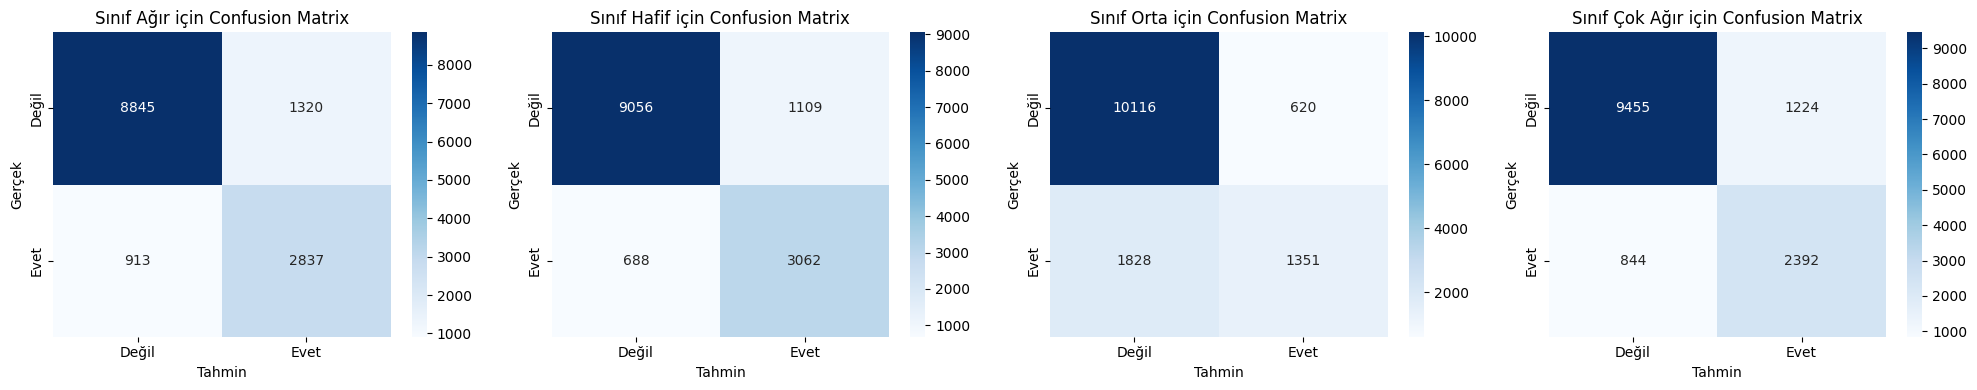

In [60]:
etiketler = np.unique(y_test16)

y_pred = best_modeller['Random Forest'].predict(X_test_16)

fig, axes = plt.subplots(1, len(etiketler), figsize=(5 * len(etiketler), 4))

for i, etiket in enumerate(etiketler):
    y_true_binary = (y_test16 == etiket).astype(int)
    y_pred_binary = (y_pred == etiket).astype(int)

    cm = confusion_matrix(y_true_binary, y_pred_binary)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Sƒ±nƒ±f {etiket} i√ßin Confusion Matrix")
    axes[i].set_xlabel("Tahmin")
    axes[i].set_ylabel("Ger√ßek")
    axes[i].set_xticklabels(["Deƒüil", "Evet"])
    axes[i].set_yticklabels(["Deƒüil", "Evet"])

plt.tight_layout()
plt.show()